<a href="https://colab.research.google.com/github/KlippL/Doctors_Reviews_NLP/blob/master/Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Makes a Good Doctor ?

## Text Analysis of Doctor Reviews Using Fisher's Discriminant, LDA and Word Embedding

Patients are increasingly turning to patient review sites when looking for new doctors. While patient reviews might not reflect the full range of experiences that a doctor provides, it is important for doctors to know what experiences patients cite when giving either good or bad reviews. 



---


Contributors: Sonal Agrawal, Jingyao Kang, Laura Klipp, Rahul Panicker

#### Background and Data Collection

Patient reviews were scraped from the two most frequently studied patient review websites, Ratemds.com and Healthgrades.com. Data was scraped for multiple specialties in various cities around the United States. 


```

```

Reviews were scraped for the following 6 specialties:
1. Family Doctors / General Practitioners
2. Internal Medicine
3. General Surgery
4. Cardiology
5. OBGYN
6. Pediatrics

Reviews were scraped in the following 5 cities:
1. Los Angeles
2. Houston
3. Atlanta
4. Detroit
5. Seattle

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np   
import nltk 
import string
import os
import gensim
from gensim import corpora
import logging
#!pip install pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")                                   #Ignoring unnecessory warnings

import matplotlib.pyplot as pyplot
from wordcloud import WordCloud
from nltk.corpus import stopwords                                   #Stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer                                 # Stemmer
from nltk.stem import WordNetLemmatizer                            # Lemmatizer
#nltk.download('punkt')
#nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Import Data Sets

* Import all scrapes from each specialty and combine them 
* Only keep the star rating from the review and the review
* Subset the data only for the good reviews (4 stars and above) and the bad reviews (3 stars and below)
* Make a dummy column of the good and bad reviews
* Make two new df of good and bad reviews

In [0]:
# Cardiologists
dfCard1 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Hou.csv", index_col =0)
dfCard2 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_LA.csv", index_col =0)
dfCard3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Atl.csv', index_col =0)
dfCard4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Sea.csv', index_col =0)
dfCard5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Det.csv', index_col =0)
dfCard6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Cardiologist_Hou.csv', sep = '\t')

# Family General Practitioners
dfGP1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Atl.csv', index_col =0)
dfGP2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Hou.csv', index_col =0)
dfGP3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_LA.csv', index_col =0)
dfGP4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Sea.csv', index_col =0)
dfGP5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Det.csv', index_col =0)
dfGP6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Family_GP_Hou.csv', sep = '\t')

# Internal Medicine
dfInt1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Atl.csv', index_col =0)
dfInt2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Hou.csv', index_col =0)
dfInt3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_LA.csv', index_col =0)
dfInt4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Sea.csv', index_col =0)
dfInt5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Det.csv', index_col =0)
dfInt6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Intern_Hou.csv', sep = '\t')

# Pediatrics
dfPed1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Atl.csv', index_col =0)
dfPed2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Hou.csv', index_col =0)
dfPed3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_LA.csv', index_col =0)
dfPed4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Sea.csv', index_col =0)
dfPed5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Det.csv', index_col =0)
dfPed6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Ped_Hou.csv', sep = '\t')

# General Surgery
dfSurg1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Atl.csv', index_col =0)
dfSurg2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Hou.csv', index_col =0)
dfSurg3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_LA.csv', index_col =0)
dfSurg4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Sea.csv', index_col =0)
dfSurg5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Det.csv', index_col =0)
dfSurg6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Surgery_Hou.csv', sep = '\t')

# OBGYN
dfOB1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Atl.csv', index_col =0)
dfOB2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Hou.csv', index_col =0)
dfOB3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_LA.csv', index_col =0)
dfOB4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Sea.csv', index_col =0)
dfOB5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Det.csv', index_col =0)
dfOB6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_OBGYN_Hou.csv', sep = '\t')

In [4]:
df_cardio = pd.concat([dfCard1, dfCard2, dfCard3, dfCard4, dfCard5, dfCard6],ignore_index=True, sort=True)
df_gp = pd.concat([dfGP1, dfGP2, dfGP3, dfGP4, dfGP5, dfGP6],ignore_index=True, sort=True)
df_intern = pd.concat([dfInt1, dfInt2, dfInt3, dfInt4, dfInt5, dfInt6],ignore_index=True, sort=True)
df_ped = pd.concat([dfPed1, dfPed2, dfPed3, dfPed4, dfPed5, dfPed6],ignore_index=True, sort=True)
df_surg = pd.concat([dfSurg1, dfSurg2, dfSurg3, dfSurg4, dfSurg5, dfSurg6],ignore_index=True, sort=True)
df_ob = pd.concat([dfOB1, dfOB2, dfOB3, dfOB4, dfOB5, dfOB6],ignore_index=True, sort=True)

df_all = pd.concat([df_cardio, df_gp, df_intern, df_ped, df_surg, df_ob], ignore_index=True, sort=True)

df_all = df_all[df_all.review.notnull()]
df_all = df_all[df_all.review != "None"]

print (len(df_all))

df_all.head()

17635


,Unnamed: 0,city,doctor_name,gender,helpfullness_rating,helpfulness_rating,individual_rating,knowledge_rating,overall_rating,review,review_count,review_date,scheduling_rating,specialty,staff_rating,state,wait_time,wait_time_rating
0,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,I was assigned Dr Attar in the Methodist ER. H...,21,2017-12-15T00:55:45.983Z,NaN,cardiologist,5,Texas,NaN,5.0
1,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,His kindness and caring gave me the sense that...,21,2016-08-30T05:07:29.955Z,NaN,Cardiologist,5,Texas,NaN,5.0
2,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,He was my cardiologist when I used to live in ...,21,2016-06-19T09:41:34.719Z,NaN,Cardiologist,5,Texas,NaN,5.0
3,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,"Dr.Attar is the best Dr anywhere, i love him t...",21,2016-03-30T02:20:23.272Z,NaN,Cardiologist,5,Texas,NaN,5.0
4,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,The doctor who was sent to us from god. He is ...,21,2014-09-10T00:46:59.381Z,NaN,Cardiologist,5,Texas,NaN,5.0


In [5]:
# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_all = df_all[['individual_rating', 'review']]
df_all.individual_rating = df_all.individual_rating.astype(float)
df_all = df_all[(df_all.individual_rating >= 4) | (df_all.individual_rating < 3)]

# Make a separate df of good reviews and bad reviews
df_good = df_all[(df_all.individual_rating >= 4)]
df_bad = df_all[(df_all.individual_rating < 3)]

# Make a dummy column in df_all for if a review is good or bad
df_all['is_good'] = (df_all.individual_rating >= 4) * 1 + (df_all.individual_rating < 3) * 0

print("Number of good reviews: ")  
(df_all['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(df_all['is_good'] == 0).sum()

Number of good reviews: 


12135

 
 Number of bad reviews:


4526

<Figure size 1800x720 with 0 Axes>

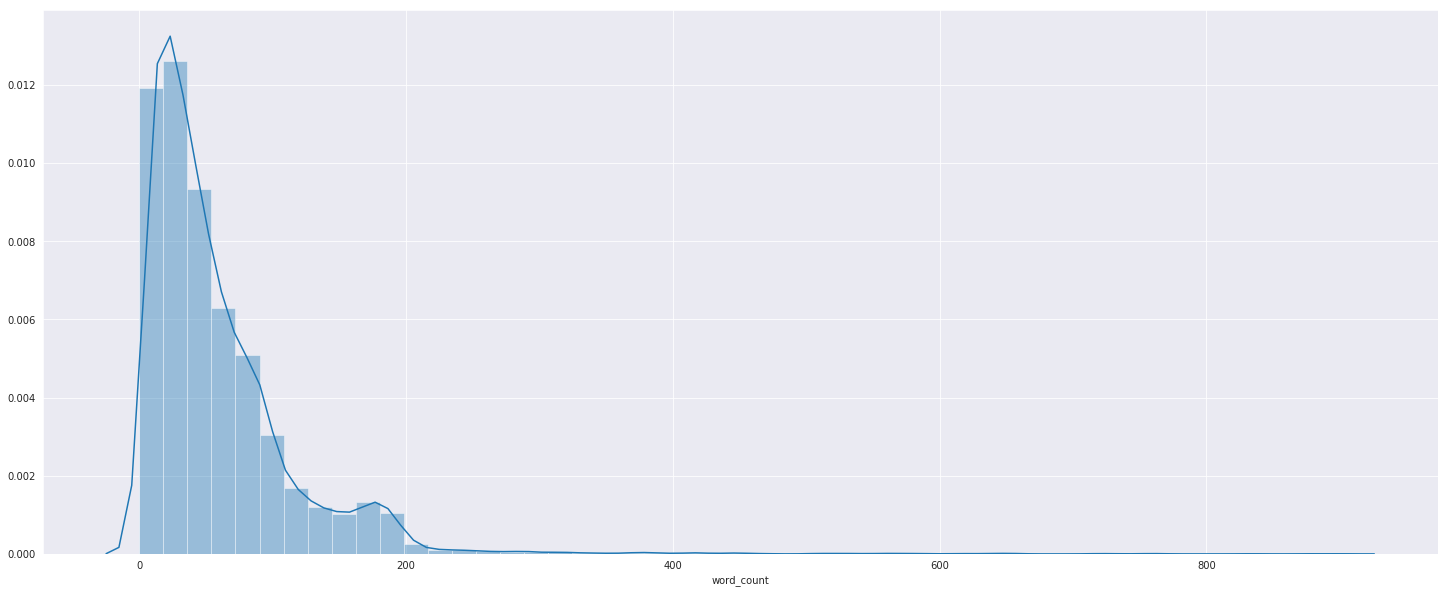

In [17]:
df_all['word_count'] = df_all['review'].apply(lambda x: len(str(x).split()))
df_all_words = df_all[df_all.word_count < 500]

sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.distplot(df_all.word_count)

<Figure size 1800x720 with 0 Axes>

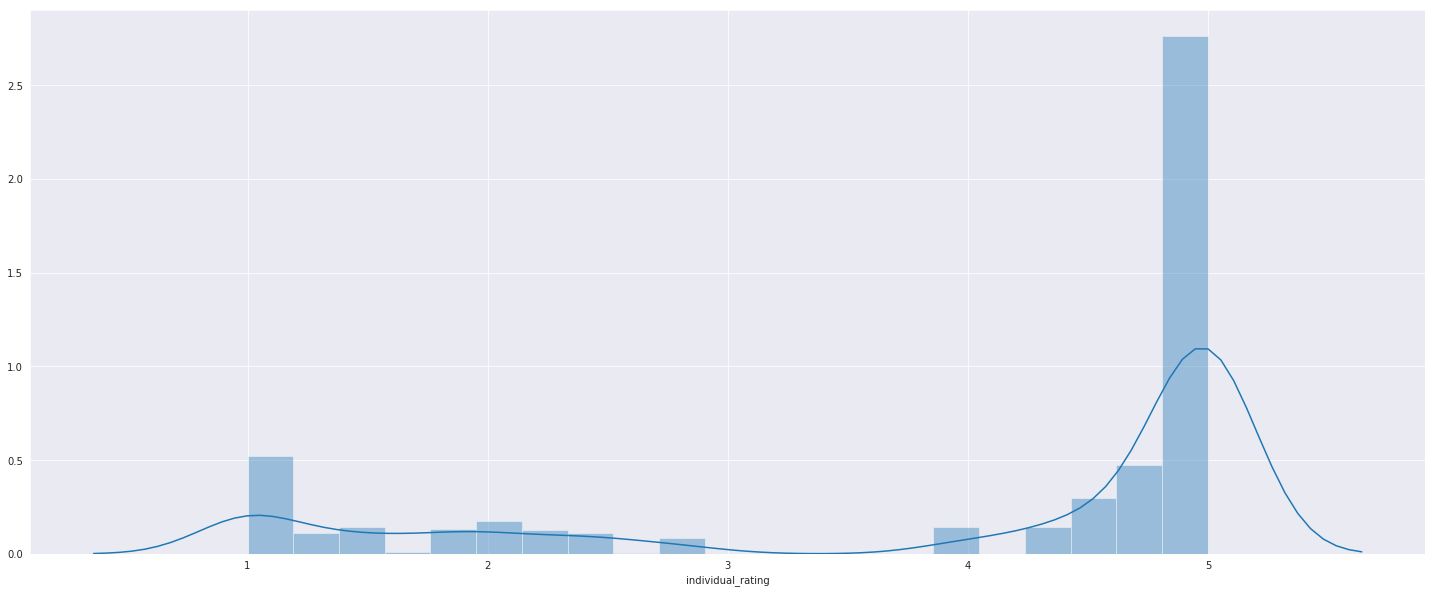

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.distplot(df_all.individual_rating)

In [12]:
random_sub = df_all.sample(n=12500, random_state = 2)
random_sub.head()

print("Number of good reviews: ")  
(random_sub['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(random_sub['is_good'] == 0).sum()

,individual_rating,review,is_good
2456,5.0,"Remarkably personal interest, and desire fore ...",1
14396,5.0,Dr. Lewis talks in detail about all my queries...,1
7722,1.0,Awful doctor with a horrible bedside manner. T...,0
16774,1.0,Because of the doctors negligence of even the ...,0
5529,2.0,Dr. Batchu will never call back & she does not...,0


Number of good reviews: 


9086

 
 Number of bad reviews:


3414

### Define Cleaning Functions

In [0]:
# Remove Punctuation
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c,"")
    return s

def removePunc(text_array):
    nopunc = []
    for h in text_array:
        try:
            nopunc.append(removePuncStr(h))
        except:
            nopunc.append(h)
    return nopunc

# Remove Numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    nonum = []
    for n in text_array:
        try:
            nonum.append(removeNumbersStr(n))
        except:
            nonum.append(i)
    return nonum

# Remove Stopwords
def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text


# Lemmentization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def lemmText(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        try:
            words = word_tokenize(h) 
            h2 = ''
            for w in words:
                h2 = h2 + ' ' + WNlemmatizer.lemmatize(w,pos="v")
            lemmatized_text.append(h2)
        except:
            lemmatized_text.append(h)
    return lemmatized_text

# Removing other words that don't impact reviews
def stopOther(text_array):
    stop_words = set(['as','dr', 'doctor', 'doctors', 'he_is', 'said', 'told', 'did_not', 'another', 'didnt', \
                      'and_then', 'to_be','would', 'get', 'go', 'even', 'takes', 'at_all', 'doesnt', 'is_not', \
                      'about_it', 'about', 'across', 'act', 'acts', 'two', 'back', 'dont', 'patient', 'office', \
                      'of_the', 'in_the', 'one', 'also', 'have_been', 'always', 'he_has', 'like', 'see', 'and_his', \
                      'of_my', 'one_of', 'is_the', 'going', 'first', 'is_very', 'anyone', 'could', 'really', 'him_to'\
                      'to_the', 'and_he', 'has_been', 'in_his', 'to_see', 'went', 'for_the', 'in_my', 'she_is', \
                      'if_you', 'way', 'many', 'hes', 'since', 'to_me', 'and_the', 'that_he', 'is_an', 'me_and', \
                      'ive', 'say', 'man', 'him_and', 'with_my', 'to_him', 'of_his', 'and_was', 'on_the', 'with_the', \
                      'with_me', 'with_his', 'second', 'much', 'of_dr', 'im', 'to_have', 'and_my', 'at_the', 'as_well', \
                      'done', 'for_my', 'to_my', 'was_very', 'the_doctor', 'me_to', 'and_very', 'it_is', 'and_have', \
                      'ago', 'to_get', 'houston', 'sure', 'you_are', 'the_most', 'for_his', 'to_dr', 'and_has', \
                      'would_not', 'saw', 'doctor_he', 'it_was', 'had_to', 'is_one', 'going_to', 'for_over', 'that_was', \
                      'thorough_and', 'us', 'able_to', 'out_of', 'he_says', 'will', 'he_was', 'ever', 'him_to', \
                      'to_the', 'make', 'took', 'made', 'he_is_very', 'care_of', 'with_dr', 'things', 'go_to', 'came', \
                      'without', 'see_him', 'been_my', 'every', 'about_his', 'is_one_of', 'to_his', 'put', 'to_make', \
                      'for_me', 'have_to', 'may', 'all_of', 'and_is', 'with_him', 'would_have', 'to_take', 'to_you', \
                      'he_is_the', 'does_not', 'with_you', 'he_did', 'him_for', 'all_the', 'have_had', 'his_time', \
                      'you_have', 'want', 'what_is', 'seems', 'doctor_is', 'and_they', 'lot', 'to_go', 'went_to', \
                      'not_be', 'from_the', 'was_in', 'to_do', 'three', 'but_he', 'one_of_the', 'several', 'for_him', \
                      'and_takes', 'takes_the', 'is_one_of_the', 'he_will', 'actually', 'not_only', 'she_was', \
                      'he_takes', 'md', 'he_is_more', 'who_is', 'was_not', 'he_should', 'he_sent', 'he_was_more', \
                      'health_the', 'heard_of', 'he_was_so', 'he_was_our', 'he_was_on', 'he_put_in', 'he_is_now', \
                      'he_is_part', 'he_is_really', 'he_is_just', 'he_is_in', 'he_only', 'he_not_only', 'he_needed_to', \
                      'he_may', 'he_just', 'he_knew_the', 'he_worked', 'he_works', 'he_wrote', 'head_now', \
                      'he_is_one_the', 'he_is_now_my', 'he_is_in_this', 'he_is_able_to', 'he_is_able_to_do', \
                      'he_is_able', 'he_is_doing_and', 'he_needed', 'he_only_has', 'year', 'years', 'got', 'to_this',\
                      'do_not', 'and_had', 'me_that', 'this_is', 'at_me', 'of_this', 'the_is', 'to_come', 'wont', \
                      'this_was', 'she_had', 'to_to', 'that_had', 'then_she', 'in_for', 'me_for', 'is_of', 'for_an', \
                      'and_when', 'with_this', 'she_is_very', 'because_of', 'am_not', 'and_did_not', 'she_and_her', \
                      'this_and', 'him_again_and', 'her_very', 'take_those', 'on_all', 'them_not', 'at_the_same',\
                      'you_from', 'you_out_of', 'and_sometimes', 'when_he_was', 'that_in', 'but_we', 'with_our', \
                      'each_other', 'for_in', 'and_he_is_the', 'he_give', 'and_over', 'only_is', 'when_there', \
                      'have_in', 'have_he', 'that_have_been', 'has_an', 'there_he', 'but_what', 'who_have', 'yr', \
                      'there_is', 'out_of_his', 'him_when', 'in_addition', 'and_he_was', 'before_he', 'no_matter', \
                      'her_with', 'be_my', 'he_is_doing', 'tx', 'for_yrs', 'can_be', 'any_other', 'with_your', \
                      'rest_of', 'know_he', 'that_know', 'with_any', 'few_and',  'me_and_was', 'did_my', 'but_she_is', \
                      'think_the', 'and_know', 'they_take', 'yrs_and', 'for_their', 'for_being', 'with_her', 'she_has', \
                      'medical', 'never', 'pysician', 'now', 'day', 'seen', 'cardiologist', 'need', 'tell', 'work', \
                      'patients', 'to_how', 'lots', 'what_should', 'and_not', 'you_to', 'on_my', 'was_the', 'she_did',\
                      'that_the', 'had_no', 'to_her', 'and_she', 'shes', 'her_to', 'and_her', 'that_she', 'they_are', 'her_she', \
                      'not_to', 'and_that', 'for_and', 'in_her', 'more_than', 'her_for', "\'", "'", 'hare', 'nd'
                     ])
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text
  
  
#Tokenize each document
def textTokenize(text_array):
   textTokens = []
   for h in text_array:
       textTokens.append(h.split(' '))
   return textTokens

### Find differences in words that are used in good and bad reviews

Generating word clouds for total reviews, good reviews, and bad reviews shows differences in....

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

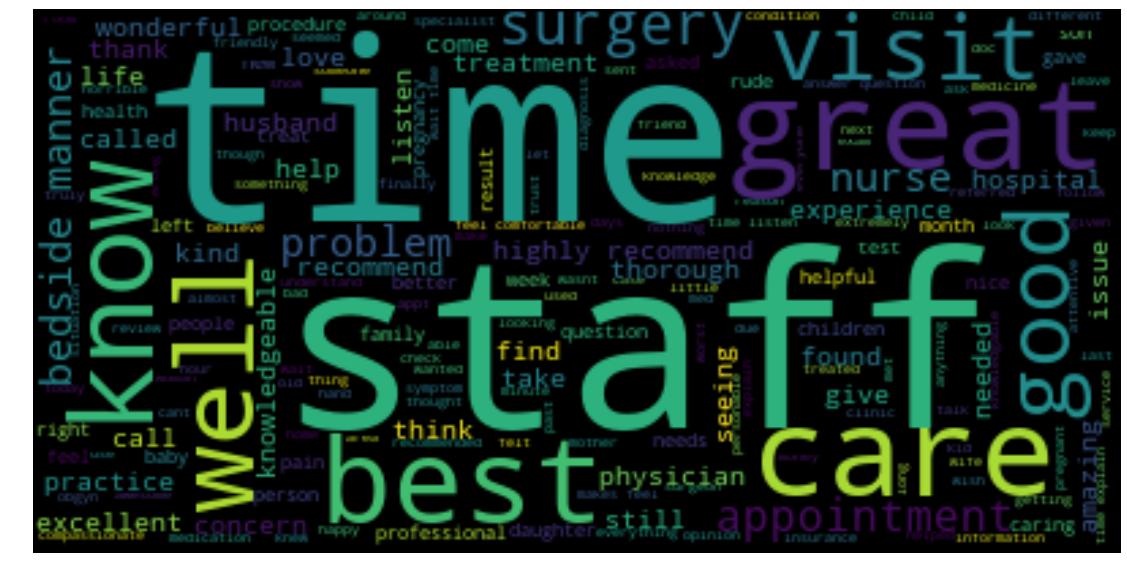

In [14]:
# Clean all reviews 
reviews_all = df_all.review.str.lower()
reviews_all = removePunc(reviews_all)
reviews_all = removeNumbers(reviews_all)
reviews_all = stopText(reviews_all)
reviews_all = stopOther(reviews_all)

# Word Cloud for all reviews
wordcloud = WordCloud().generate(pd.Series(reviews_all).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

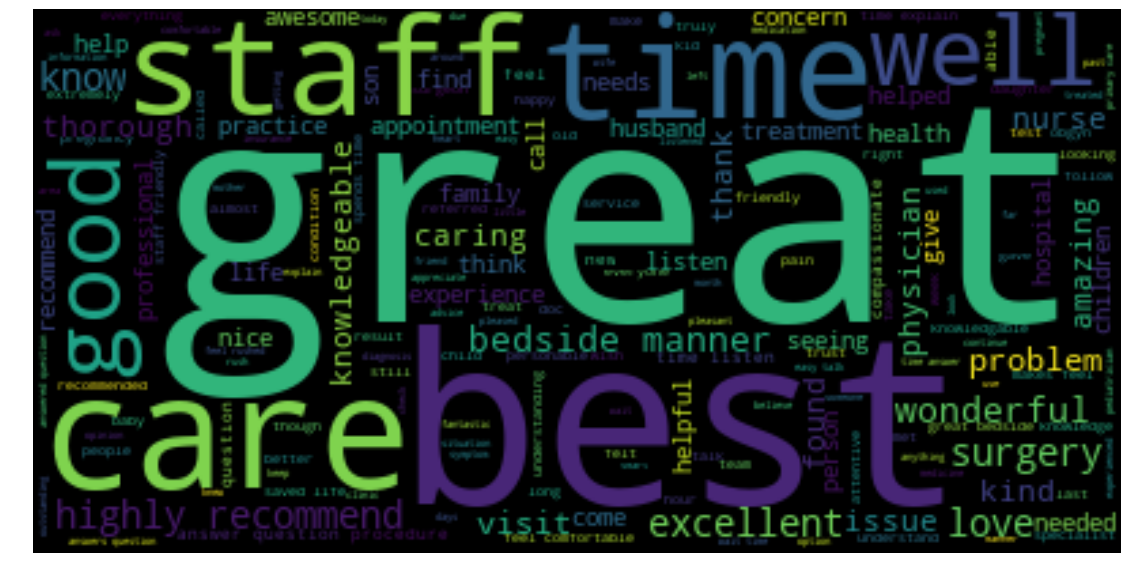

In [15]:
# Clean good reviews
reviews_good = df_good.review.str.lower()
reviews_good = removePunc(reviews_good)
reviews_good = removeNumbers(reviews_good)
reviews_good = stopText(reviews_good)
reviews_good = stopOther(reviews_good)
wordcloud = WordCloud().generate(pd.Series(reviews_good).str.cat(sep = " "))

# Word Cloud for good reviews
pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

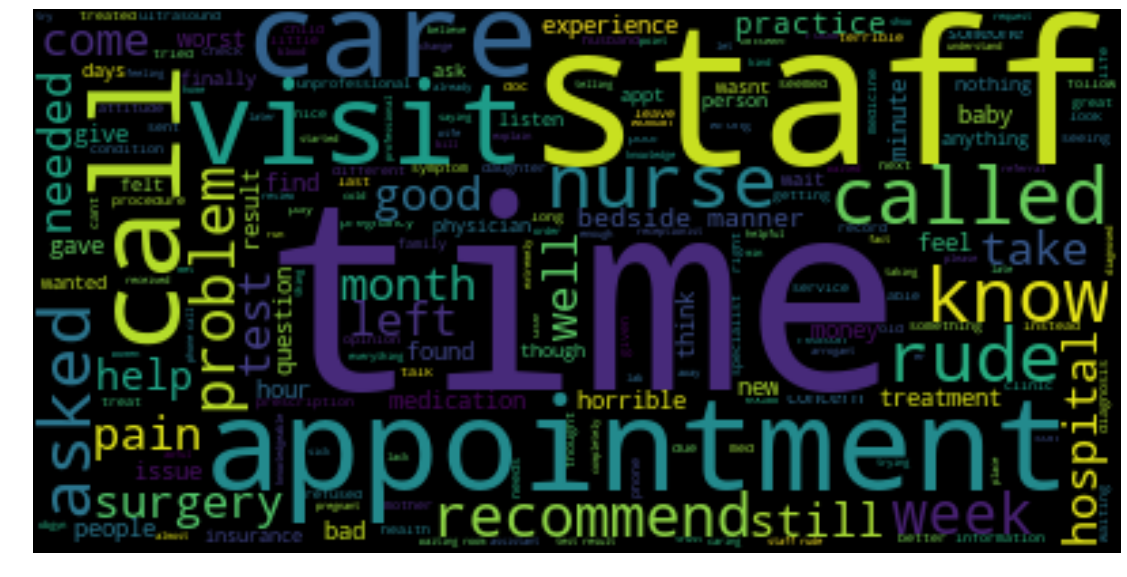

In [16]:
# Clean bad reviews
reviews_bad = df_bad.review.str.lower()
reviews_bad = removePunc(reviews_bad)
reviews_bad = removeNumbers(reviews_bad)
reviews_bad = stopText(reviews_bad)
reviews_bad = stopOther(reviews_bad)

# Word Cloud for bad reviews
wordcloud = WordCloud().generate(pd.Series(reviews_bad).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

## Text Analysis

In [0]:
reviews_sub = random_sub.review.str.lower()
reviews_sub = removePunc(reviews_sub)
reviews_sub = removeNumbers(reviews_sub)
reviews_sub = stopOther(reviews_sub)

vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X = vec.fit_transform(reviews_sub)

In [18]:
dtm = pd.DataFrame(X.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm = dtm.T
print(tdm.shape)

(14944, 12500)


### Calculate Fisher's Discriminant Score

In [19]:
len(dtm)

12500

In [20]:
mask = pd.DataFrame(random_sub.is_good)
good_df = dtm.iloc[np.any(mask.values,axis=1),]
bad_df = dtm.iloc[~np.any(mask.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [21]:
FiDi = pd.DataFrame(((good_df.mean() - bad_df.mean())**2)/(np.std(good_df)**2 + np.std(bad_df)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words = FiDi.term.tolist()
words = stopText(words)
words = stopOther(words)

words = pd.Series(words).str.lstrip(" ").tolist()

FiDi = FiDi[FiDi.term.isin(words)].sort_values(by = 'FiDi_score', ascending = False)
FiDi.head(20)

,term,FiDi_score
10108,rude,0.166455
1906,best,0.128238
4427,great,0.126221
11565,the_best,0.126148
5583,highly,0.094513
2418,caring,0.094314
3521,excellent,0.093744
14696,worst,0.086188
5588,highly_recommend,0.074353
14648,wonderful,0.073673


### Create DF of most Frequent Words

In [22]:
tdm['total'] = tdm.sum(axis =1)
freq = tdm.reset_index().rename(columns = {"level_0":"allwords"})

words2 = freq.allwords.tolist()
words2 = stopText(words2)
words2 = stopOther(words2)

words2 = pd.Series(words2).str.lstrip(" ").tolist()

freq = freq[freq.allwords.isin(words2)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq.head(25)

,allwords,total
12396,time,3863
10939,staff,3111
4427,great,2368
2336,care,2314
9813,recommend,2079
1906,best,1986
4380,good,1549
2418,caring,1464
9704,questions,1442
3758,feel,1379


### Most frequent phrases

In [23]:
freq['under_count'] = freq.allwords.str.count('_')
freq[freq.under_count>=3].head(25)

,allwords,total,under_count


## Word Embedding for Good and Bad Reviews

We use word embedding on popular but general terms to find out related words that help define why patients were either pleased or displeased. 

### Good Reviews

In [98]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences_g = textTokenize(reviews_good)
while("" in sentences_g) : 
   sentences_g.remove("")

#Train the model on Word2Vec
model_g = gensim.models.Word2Vec(sentences_g, min_count=1)

df_words_good = pd.DataFrame()
word_list_good = ('time', 'call', 'staff', 'great', 'visit', 'well', 'good', 'care')
for i in word_list_good: 
  output = model_g.wv.most_similar(i,topn=7)
  dic = {i: output}
  df = pd.DataFrame.from_dict(dic).T
  df_words_good = pd.concat([df, df_words_good], sort=True)
  
df_words_good

,0,1,2,3,4,5,6
recommend,"(recommened, 0.9551154375076294)","(recommended, 0.9509034156799316)","(mamma, 0.9041059017181396)","(fori, 0.9023505449295044)","(recomended, 0.8880579471588135)","(berman, 0.8767879009246826)","(recommed, 0.8720508217811584)"
care,"(treats, 0.9925065040588379)","(respect, 0.9912707209587097)","(field, 0.9904365539550781)","(whole, 0.9892942905426025)","(utmost, 0.9888224601745605)","(human, 0.9882945418357849)","(individual, 0.9874516129493713)"
good,"(terrific, 0.9925246834754944)","(fantastic, 0.9903591871261597)","(funny, 0.9899349808692932)","(earth, 0.9898290634155273)","(personality, 0.989531934261322)","(sense, 0.9894038438796997)","(energetic, 0.9889112710952759)"
well,"(concern, 0.996412992477417)","(responsive, 0.994278073310852)","(goes, 0.9940320253372192)","(provides, 0.9939152002334595)","(interested, 0.9934033155441284)","(million, 0.9933228492736816)","(needs, 0.9931963682174683)"
visit,"(confident, 0.9836386442184448)","(pressured, 0.9813395142555237)","(pan, 0.9804202318191528)","(welcome, 0.9802993535995483)","(relaxed, 0.9790182113647461)","(secure, 0.9787882566452026)","(making, 0.9782497882843018)"
great,"(interpersonal, 0.985276460647583)","(excellent, 0.9851905107498169)","(humor, 0.9819055199623108)","(gentle, 0.9797502160072327)","(energetic, 0.9796010255813599)","(good, 0.9793474674224854)","(warm, 0.9783201217651367)"
staff,"(courteous, 0.986098051071167)","(nice, 0.983850359916687)","(helpful, 0.9825947284698486)","(efficient, 0.9825103282928467)","(friendly, 0.981672465801239)","(super, 0.9805057644844055)","(polite, 0.9793870449066162)"
call,"(results, 0.9954004883766174)","(hr, 0.9943020343780518)","(hour, 0.99339359998703)","(phone, 0.9933750629425049)","(typically, 0.9932692050933838)","(right, 0.9931210279464722)","(min, 0.9913902282714844)"
time,"(spent, 0.9896547794342041)","(rush, 0.9880768060684204)","(explain, 0.9838628172874451)","(talk, 0.983193039894104)","(dudley, 0.9830174446105957)","(everything, 0.9797228574752808)","(understand, 0.9791556596755981)"


### Bad Reviews

In [99]:
sentences_b = textTokenize(reviews_bad)
while("" in sentences_b) : 
   sentences_b.remove("")

#Train the model on Word2Vec
model_b = gensim.models.Word2Vec(sentences_b, min_count=1)

df_words_bad = pd.DataFrame()
word_list_bad = ('time', 'highly', 'staff', 'appointment', 'worst', 'wonderful', 'asked', 'called', 'recommend', 'surgery')
for i in word_list_bad: 
  output = model_b.wv.most_similar(i,topn=7)
  dic = {i: output}
  df = pd.DataFrame.from_dict(dic).T
  df_words_bad = pd.concat([df, df_words_bad], sort=True)
  
df_words_bad

2019-06-09 00:04:23,774 : INFO : collecting all words and their counts
2019-06-09 00:04:23,776 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-09 00:04:23,820 : INFO : collected 14084 word types from a corpus of 141553 raw words and 4526 sentences
2019-06-09 00:04:23,822 : INFO : Loading a fresh vocabulary
2019-06-09 00:04:23,868 : INFO : effective_min_count=1 retains 14084 unique words (100% of original 14084, drops 0)
2019-06-09 00:04:23,869 : INFO : effective_min_count=1 leaves 141553 word corpus (100% of original 141553, drops 0)
2019-06-09 00:04:23,923 : INFO : deleting the raw counts dictionary of 14084 items
2019-06-09 00:04:23,925 : INFO : sample=0.001 downsamples 31 most-common words
2019-06-09 00:04:23,929 : INFO : downsampling leaves estimated 132947 word corpus (93.9% of prior 141553)
2019-06-09 00:04:23,977 : INFO : estimated required memory for 14084 words and 100 dimensions: 18309200 bytes
2019-06-09 00:04:23,979 : INFO : resetting laye

,0,1,2,3,4,5,6
surgery,"(ended, 0.9999076724052429)","(wanted, 0.9999030828475952)","(specialist, 0.9998921751976013)","(meds, 0.9998906850814819)","(infection, 0.999889612197876)","(found, 0.9998893737792969)","(different, 0.9998883008956909)"
recommend,"(arrogant, 0.999905526638031)","(great, 0.9998549818992615)","(absolutely, 0.9998478889465332)","(encountered, 0.9998441934585571)","(listen, 0.9998294115066528)","(needs, 0.9998154640197754)","(uncaring, 0.999805212020874)"
called,"(call, 0.9994938373565674)","(week, 0.9988830089569092)","(later, 0.9986296892166138)","(next, 0.9984524846076965)","(reschedule, 0.9979908466339111)","(appt, 0.9979212284088135)","(finally, 0.9978888034820557)"
asked,"(month, 0.9997168183326721)","(months, 0.9996958374977112)","(still, 0.9996530413627625)","(prescription, 0.9996029734611511)","(discuss, 0.9995852708816528)","(check, 0.9995601177215576)","(showed, 0.999543309211731)"
wonderful,"(wish, 0.9998157620429993)","(worse, 0.999802827835083)","(human, 0.9997960329055786)","(people, 0.9997734427452087)","(avoid, 0.9997714757919312)","(definitely, 0.9997692108154297)","(thinks, 0.9997684955596924)"
worst,"(horrible, 0.9997033476829529)","(experience, 0.9990873336791992)","(terrible, 0.998872697353363)","(poor, 0.9986449480056763)","(rude, 0.998389720916748)","(awful, 0.9978076219558716)","(unprofessional, 0.9974077939987183)"
appointment,"(lobby, 0.9973829984664917)","(time, 0.997374415397644)","(hours, 0.9973466992378235)","(late, 0.9954401254653931)","(mins, 0.9953202605247498)","(long, 0.9951778650283813)","(half, 0.9949942231178284)"
staff,"(extremely, 0.9995959997177124)","(, 0.999377429485321)","(unprofessional, 0.9989882111549377)","(rudest, 0.9989562034606934)","(inconsiderate, 0.9988387227058411)","(disrespectful, 0.9988019466400146)","(abrupt, 0.998711109161377)"
highly,"(best, 0.9998747110366821)","(worse, 0.9998703002929688)","(please, 0.9998611211776733)","(wish, 0.9998569488525391)","(avoid, 0.9998561143875122)","(woman, 0.9998524785041809)","(practice, 0.9998517036437988)"
time,"(long, 0.9994760751724243)","(lobby, 0.9991382360458374)","(late, 0.9988223910331726)","(waits, 0.9985623359680176)","(mins, 0.9985436201095581)","(half, 0.9982094764709473)","(packed, 0.9977675676345825)"


## Topic Analysis Using LDA

### Topic Analysis for Overall Reviews

In [0]:
# Topic Analysis for all reviews
rvws_all = stopText(reviews_all)
rvws_all = stopOther(rvws_all)
clean_rvws_all = [i.split() for i in rvws_all]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_all = corpora.Dictionary(clean_rvws_all)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_all = [dictionary_all.doc2bow(doc) for doc in clean_rvws_all]

In [25]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_all = Lda(doc_term_matrix_all, num_topics=5, id2word = dictionary_all, passes=50)

#Results
print(ldamodel_all.print_topics(num_topics=5, num_words=7))

[(0, '0.009*"time" + 0.008*"call" + 0.007*"staff" + 0.007*"called" + 0.006*"appointment" + 0.006*"care" + 0.006*"know"'), (1, '0.018*"wait" + 0.018*"time" + 0.015*"room" + 0.015*"waiting" + 0.013*"staff" + 0.012*"rude" + 0.011*"minutes"'), (2, '0.031*"time" + 0.021*"care" + 0.017*"questions" + 0.016*"best" + 0.014*"recommend" + 0.014*"caring" + 0.013*"feel"'), (3, '0.034*"great" + 0.025*"staff" + 0.020*"manner" + 0.019*"bedside" + 0.019*"recommend" + 0.014*"delivered" + 0.013*"best"'), (4, '0.037*"surgery" + 0.018*"life" + 0.012*"surgeon" + 0.012*"son" + 0.009*"pain" + 0.007*"god" + 0.007*"thank"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'time'),
 Text(0, 0, 'call'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'called'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'care'),
 Text(0, 0, 'know'),
 Text(0, 0, 'results'),
 Text(0, 0, 'asked'),
 Text(0, 0, 'hospital')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'wait'),
 Text(0, 0, 'time'),
 Text(0, 0, 'room'),
 Text(0, 0, 'waiting'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'minutes'),
 Text(0, 0, '’'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'hour')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'time'),
 Text(0, 0, 'care'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'best'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'great')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'great'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'bedside'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'delivered'),
 Text(0, 0, 'best'),
 Text(0, 0, 'wonderful'),
 Text(0, 0, 'love'),
 Text(0, 0, 'experience')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

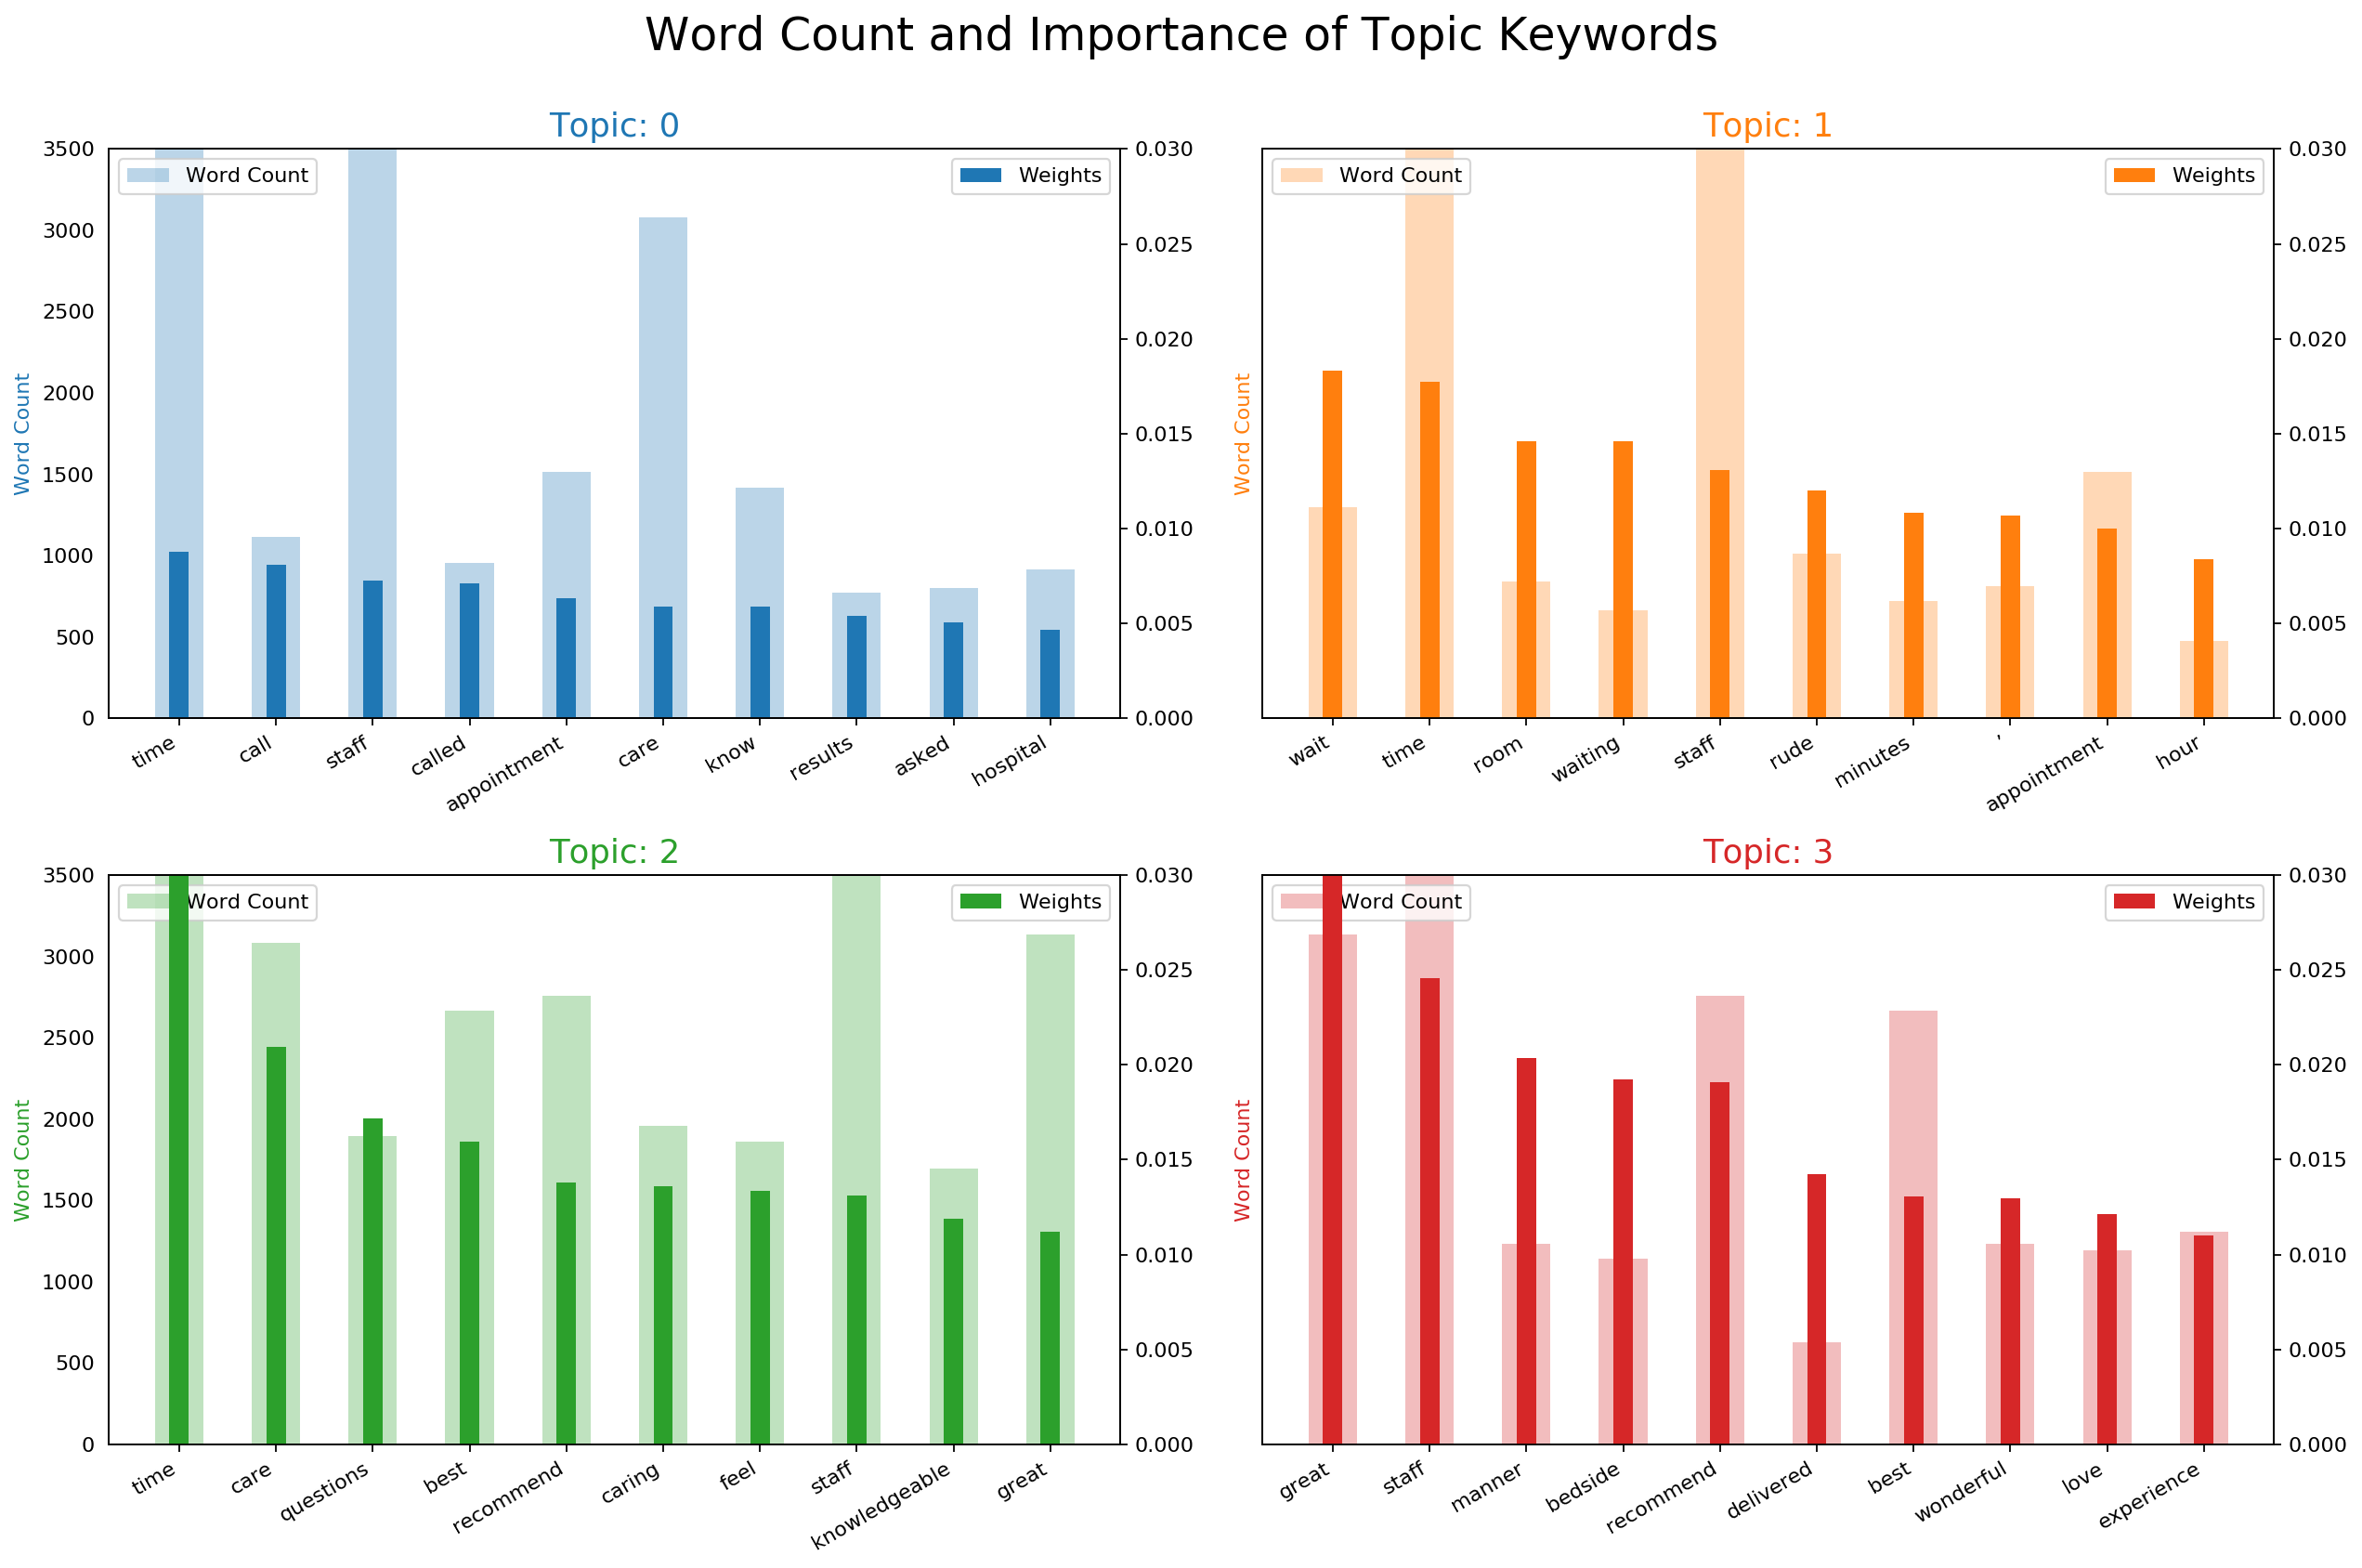

In [26]:
topics = ldamodel_all.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_all for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_all, doc_term_matrix_all, dictionary=ldamodel_all.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.082519  0.070715       1        1  36.315598
2     -0.168471  0.048739       2        1  25.813126
3     -0.229771  0.008661       3        1  14.045930
4      0.104921 -0.296303       4        1  12.069893
1      0.210801  0.168188       5        1  11.755455, topic_info=      Category         Freq            Term        Total  loglift  logprob
542    Default  1621.000000         surgery  1621.000000  30.0000  30.0000
8      Default  2813.000000           great  2813.000000  29.0000  29.0000
214    Default  4846.000000            time  4846.000000  28.0000  28.0000
150    Default  1039.000000          manner  1039.000000  27.0000  27.0000
188    Default  2562.000000       recommend  2562.000000  26.0000  26.0000
3      Default   981.000000         bedside   981.000000  25.0000  25.0000
116    Default  4002.000000           staff  4002.000000  24.0000  24.0000
677    Default  1217.000000            wait  1217.000000  23.0000  23.0000
50     Default   975.000000            life   975.000000  22.0000  22.0000
21     Default  2454.000000            best  2454.000000  21.0000  21.0000
23     Default  1776.000000          caring  1776.000000  20.0000  20.0000
222    Default  1979.000000       questions  1979.000000  19.0000  19.0000
59     Default  2841.000000            care  2841.000000  18.0000  18.0000
7027   Default   728.000000       delivered   728.000000  17.0000  17.0000
1077   Default   810.000000            room   810.000000  16.0000  16.0000
89     Default  1187.000000       wonderful  1187.000000  15.0000  15.0000
182    Default  1351.000000          highly  1351.000000  14.0000  14.0000
159    Default  1467.000000   knowledgeable  1467.000000  13.0000  13.0000
665    Default   623.000000         waiting   623.000000  12.0000  12.0000
66     Default  1160.000000            love  1160.000000  11.0000  11.0000
416    Default   923.000000            rude   923.000000  10.0000  10.0000
91     Default  1278.000000       excellent  1278.000000   9.0000   9.0000
891    Default   959.000000               ’   959.000000   8.0000   8.0000
314    Default  1042.000000        friendly  1042.000000   7.0000   7.0000
156    Default  1882.000000            feel  1882.000000   6.0000   6.0000
5639   Default   953.000000            baby   953.000000   5.0000   5.0000
741    Default   511.000000         surgeon   511.000000   4.0000   4.0000
296    Default  1170.000000    professional  1170.000000   3.0000   3.0000
47     Default  1070.000000            call  1070.000000   2.0000   2.0000
804    Default   638.000000         minutes   638.000000   1.0000   1.0000
47      Topic1  1069.516602            call  1070.273560   1.0122  -4.8150
348     Topic1   936.550781          called   937.307068   1.0121  -4.9477
328     Topic1   713.860962         results   714.617371   1.0119  -5.2192
543     Topic1   533.393494            test   534.143494   1.0115  -5.5107
402     Topic1   526.296875           phone   527.051758   1.0115  -5.5240
782     Topic1   475.375397           blood   476.128265   1.0113  -5.6258
461     Topic1   422.746582           tests   423.499054   1.0111  -5.7431
1377    Topic1   416.945984          wanted   417.705261   1.0111  -5.7570
1277    Topic1   398.546661            week   399.306274   1.0110  -5.8021
4906    Topic1   306.647644      ultrasound   307.406769   1.0105  -6.0642
43      Topic1   279.591034            stay   280.348358   1.0102  -6.1566
1490    Topic1   248.196533          return   248.948898   1.0099  -6.2757
1227    Topic1   227.557404      medication   228.308670   1.0096  -6.3625
707     Topic1   213.107712             lab   213.858124   1.0094  -6.4281
686     Topic1   206.170181    prescription   206.920441   1.0093  -6.4612
410     Topic1   203.329895         records   204.081284   1.0092  -6.4751
759     Topic1   192.011444            read   192.7644

## Topic Analysis for Good Reviews

In [0]:
# Topic Analysis for good reviews
rvws_g = stopText(reviews_good)
rvws_g = stopOther(reviews_good)
clean_rvws_g = [i.split() for i in rvws_g]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_g = corpora.Dictionary(clean_rvws_g)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_g = [dictionary_g.doc2bow(doc) for doc in clean_rvws_g]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_g = Lda(doc_term_matrix_g, num_topics=5, id2word = dictionary_g, passes=50)

#Results
print(ldamodel_g.print_topics(num_topics=5, num_words=7))

[(0, '0.025*"surgery" + 0.016*"life" + 0.012*"bedside" + 0.011*"manner" + 0.010*"great" + 0.009*"surgeon" + 0.008*"care"'), (1, '0.042*"time" + 0.020*"questions" + 0.011*"great" + 0.010*"feel" + 0.010*"concerns" + 0.009*"good" + 0.008*"wait"'), (2, '0.005*"started" + 0.005*"gave" + 0.005*"still" + 0.004*"medicine" + 0.004*"know" + 0.004*"nd" + 0.004*"serious"'), (3, '0.024*"best" + 0.019*"care" + 0.015*"delivered" + 0.015*"’" + 0.013*"baby" + 0.011*"obgyn" + 0.011*"children"'), (4, '0.042*"staff" + 0.031*"great" + 0.029*"recommend" + 0.027*"love" + 0.020*"caring" + 0.019*"friendly" + 0.018*"professional"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'life'),
 Text(0, 0, 'bedside'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'great'),
 Text(0, 0, 'surgeon'),
 Text(0, 0, 'care'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'good')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'time'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'great'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'concerns'),
 Text(0, 0, 'good'),
 Text(0, 0, 'wait'),
 Text(0, 0, 'care'),
 Text(0, 0, 'listens'),
 Text(0, 0, 'knowledgeable')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'started'),
 Text(0, 0, 'gave'),
 Text(0, 0, 'still'),
 Text(0, 0, 'medicine'),
 Text(0, 0, 'know'),
 Text(0, 0, 'nd'),
 Text(0, 0, 'serious'),
 Text(0, 0, 'husband'),
 Text(0, 0, 'parker'),
 Text(0, 0, 'hare')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'best'),
 Text(0, 0, 'care'),
 Text(0, 0, 'delivered'),
 Text(0, 0, '’'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'obgyn'),
 Text(0, 0, 'children'),
 Text(0, 0, 'pregnancy'),
 Text(0, 0, 'health'),
 Text(0, 0, 'daughter')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

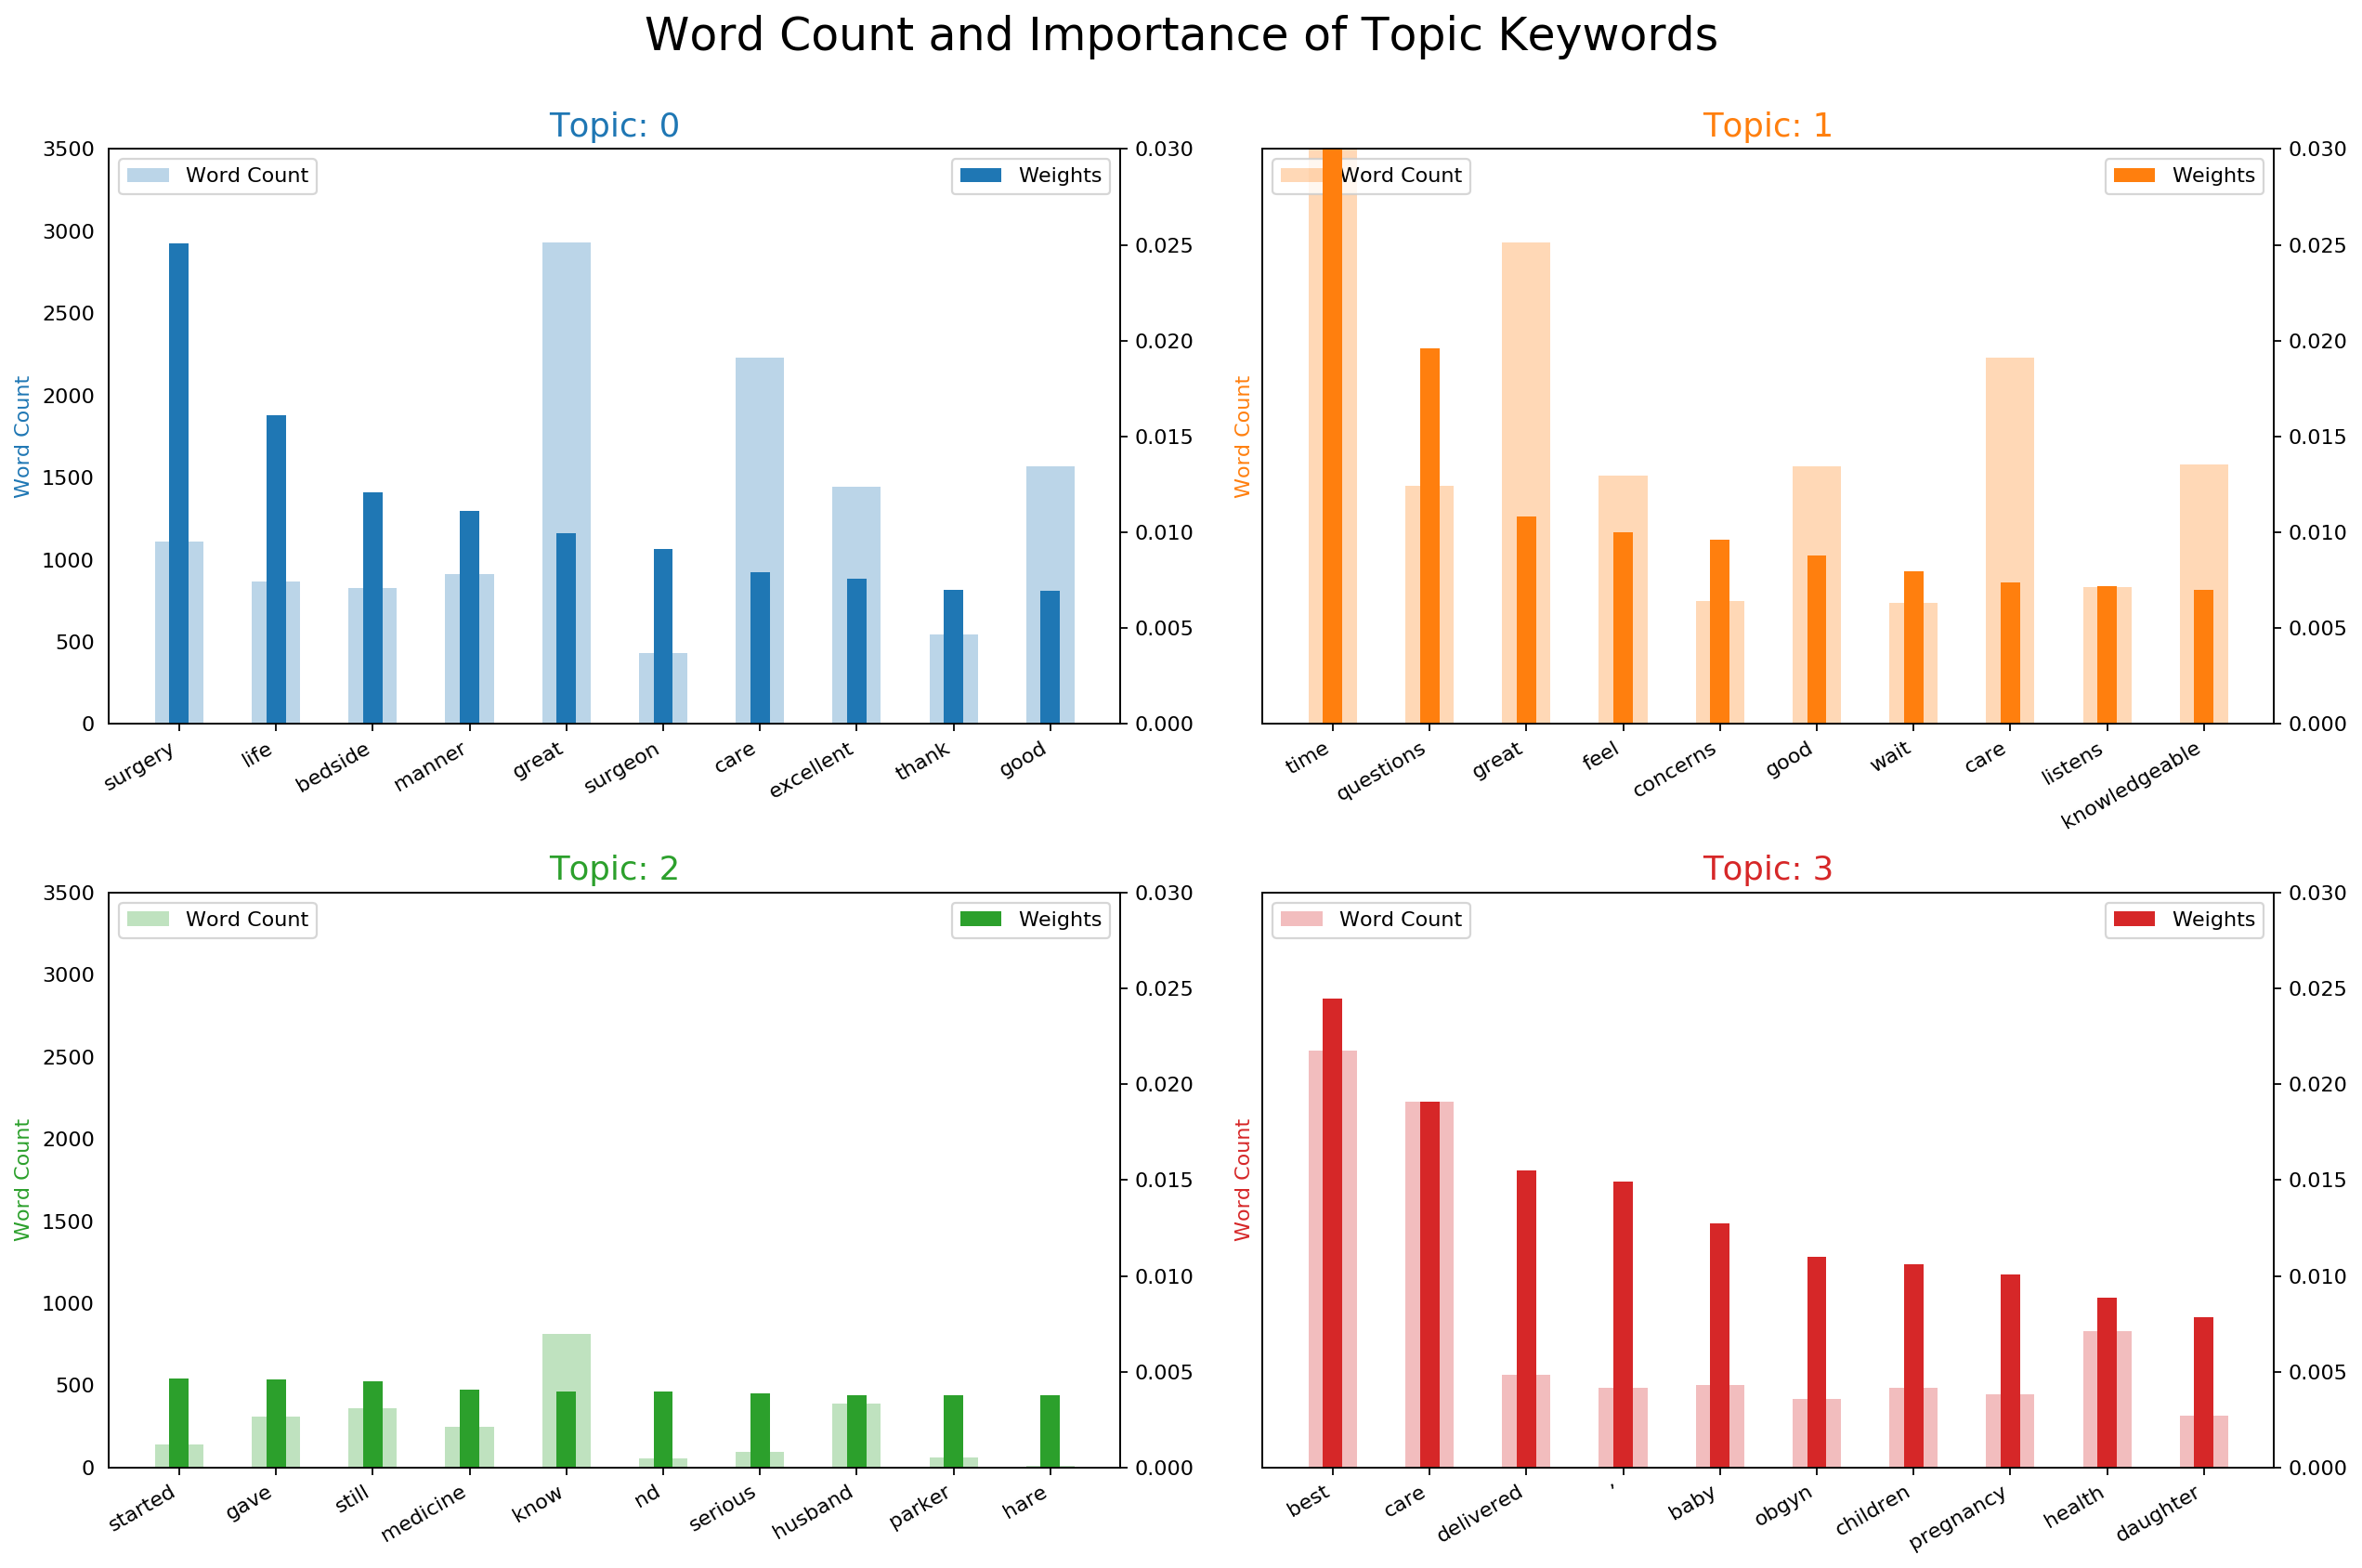

In [30]:
topics = ldamodel_g.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_g for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_g, doc_term_matrix_g, dictionary=ldamodel_g.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.133720  0.015528       1        1  34.664627
4     -0.149762  0.168603       2        1  19.903263
0     -0.006465 -0.225328       3        1  18.994471
3     -0.046498 -0.031360       4        1  18.909357
2      0.336445  0.072558       5        1   7.528280, topic_info=      Category         Freq           Term        Total  loglift  logprob
214    Default  3530.000000           time  3530.000000  30.0000  30.0000
116    Default  2489.000000          staff  2489.000000  29.0000  29.0000
66     Default  1223.000000           love  1223.000000  28.0000  28.0000
440    Default  1079.000000        surgery  1079.000000  27.0000  27.0000
222    Default  1538.000000      questions  1538.000000  26.0000  26.0000
8      Default  2671.000000          great  2671.000000  25.0000  25.0000
314    Default   846.000000       friendly   846.000000  24.0000  24.0000
188    Default  1988.000000      recommend  1988.000000  23.0000  23.0000
5074   Default   662.000000      delivered   662.000000  22.0000  22.0000
296    Default  1116.000000   professional  1116.000000  21.0000  21.0000
779    Default   638.000000              ’   638.000000  20.0000  20.0000
50     Default   759.000000           life   759.000000  19.0000  19.0000
186    Default   694.000000           nice   694.000000  18.0000  18.0000
4113   Default   545.000000           baby   545.000000  17.0000  17.0000
282    Default   870.000000        helpful   870.000000  16.0000  16.0000
182    Default  1132.000000         highly  1132.000000  15.0000  15.0000
21     Default  2231.000000           best  2231.000000  14.0000  14.0000
3      Default   835.000000        bedside   835.000000  13.0000  13.0000
4210   Default   470.000000          obgyn   470.000000  12.0000  12.0000
150    Default   876.000000         manner   876.000000  11.0000  11.0000
23     Default  1664.000000         caring  1664.000000  10.0000  10.0000
159    Default  1403.000000  knowledgeable  1403.000000   9.0000   9.0000
97     Default   481.000000       children   481.000000   8.0000   8.0000
583    Default   760.000000    comfortable   760.000000   7.0000   7.0000
629    Default   392.000000        surgeon   392.000000   6.0000   6.0000
134    Default   897.000000         family   897.000000   5.0000   5.0000
346    Default   804.000000          visit   804.000000   4.0000   4.0000
59     Default  2017.000000           care  2017.000000   3.0000   3.0000
881    Default   335.000000       daughter   335.000000   2.0000   2.0000
5866   Default   543.000000      pregnancy   543.000000   1.0000   1.0000
222     Topic1  1538.210815      questions  1538.995728   1.0589  -3.9314
453     Topic1   477.757568         answer   478.539154   1.0578  -5.1007
208     Topic1   420.949432        explain   421.734436   1.0576  -5.2273
772     Topic1   440.226715         listen   441.144684   1.0574  -5.1825
215     Topic1   367.669434        answers   368.452240   1.0573  -5.3626
738     Topic1   297.820343       answered   298.604309   1.0568  -5.5733
650     Topic1   251.123215         spends   251.902878   1.0564  -5.7439
857     Topic1   229.340790        minutes   230.125702   1.0560  -5.8346
465     Topic1   197.278000          spent   198.063431   1.0555  -5.9852
582     Topic1   188.199661          worth   188.983444   1.0553  -6.0323
106     Topic1   183.848557          gives   184.631012   1.0552  -6.0557
750     Topic1   180.834824       question   181.619537   1.0551  -6.0722
375     Topic1   171.756058      sometimes   172.538956   1.0549  -6.1237
936     Topic1   159.215622          thing   160.003815   1.0545  -6.1996
1591    Topic1   149.884384        willing   150.666946   1.0542  -6.2599
894     Topic1   137.446259          might   138.255203   1.0536  -6.3466
870     Topic1   125.382568       schedule   126.169655   1.0532  -6.4384
1420    Topic1   117.775444

## Topic Analysis for Bad Reviews

In [0]:
# Topic Analysis for good reviews
rvws_b = stopText(reviews_bad)
rvws_b = stopOther(reviews_bad)
clean_rvws_b = [i.split() for i in rvws_b]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_b = corpora.Dictionary(clean_rvws_b)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_b = [dictionary_b.doc2bow(doc) for doc in clean_rvws_b]

In [33]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_b = Lda(doc_term_matrix_b, num_topics=5, id2word = dictionary_b, passes=50)

#Results
print(ldamodel_b.print_topics(num_topics=5, num_words=7))

[(0, '0.008*"rude" + 0.008*"staff" + 0.007*"called" + 0.007*"call" + 0.006*"care" + 0.005*"horrible" + 0.005*"recommend"'), (1, '0.008*"time" + 0.006*"visit" + 0.006*"know" + 0.006*"experience" + 0.005*"surgery" + 0.005*"found" + 0.005*"nurse"'), (2, '0.016*"baby" + 0.009*"pregnancy" + 0.008*"pain" + 0.007*"hospital" + 0.006*"ultrasound" + 0.006*"weeks" + 0.005*"know"'), (3, '0.012*"insurance" + 0.010*"test" + 0.010*"surgery" + 0.007*"tests" + 0.007*"care" + 0.006*"cancer" + 0.006*"blood"'), (4, '0.023*"time" + 0.023*"staff" + 0.015*"appointment" + 0.012*"rude" + 0.012*"wait" + 0.009*"waiting" + 0.009*"room"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'rude'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'called'),
 Text(0, 0, 'call'),
 Text(0, 0, 'care'),
 Text(0, 0, 'horrible'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'time'),
 Text(0, 0, 'days')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'time'),
 Text(0, 0, 'visit'),
 Text(0, 0, 'know'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'surgery'),
 Text(0, 0, 'found'),
 Text(0, 0, 'nurse'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'results'),
 Text(0, 0, 'gave')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'baby'),
 Text(0, 0, 'pregnancy'),
 Text(0, 0, 'pain'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'ultrasound'),
 Text(0, 0, 'weeks'),
 Text(0, 0, 'know'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'delivery'),
 Text(0, 0, 'good')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'insurance'),
 Text(0, 0, 'test'),
 Text(0, 0, 'surgery'),
 Text(0, 0, 'tests'),
 Text(0, 0, 'care'),
 Text(0, 0, 'cancer'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'results'),
 Text(0, 0, 'company'),
 Text(0, 0, 'money')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

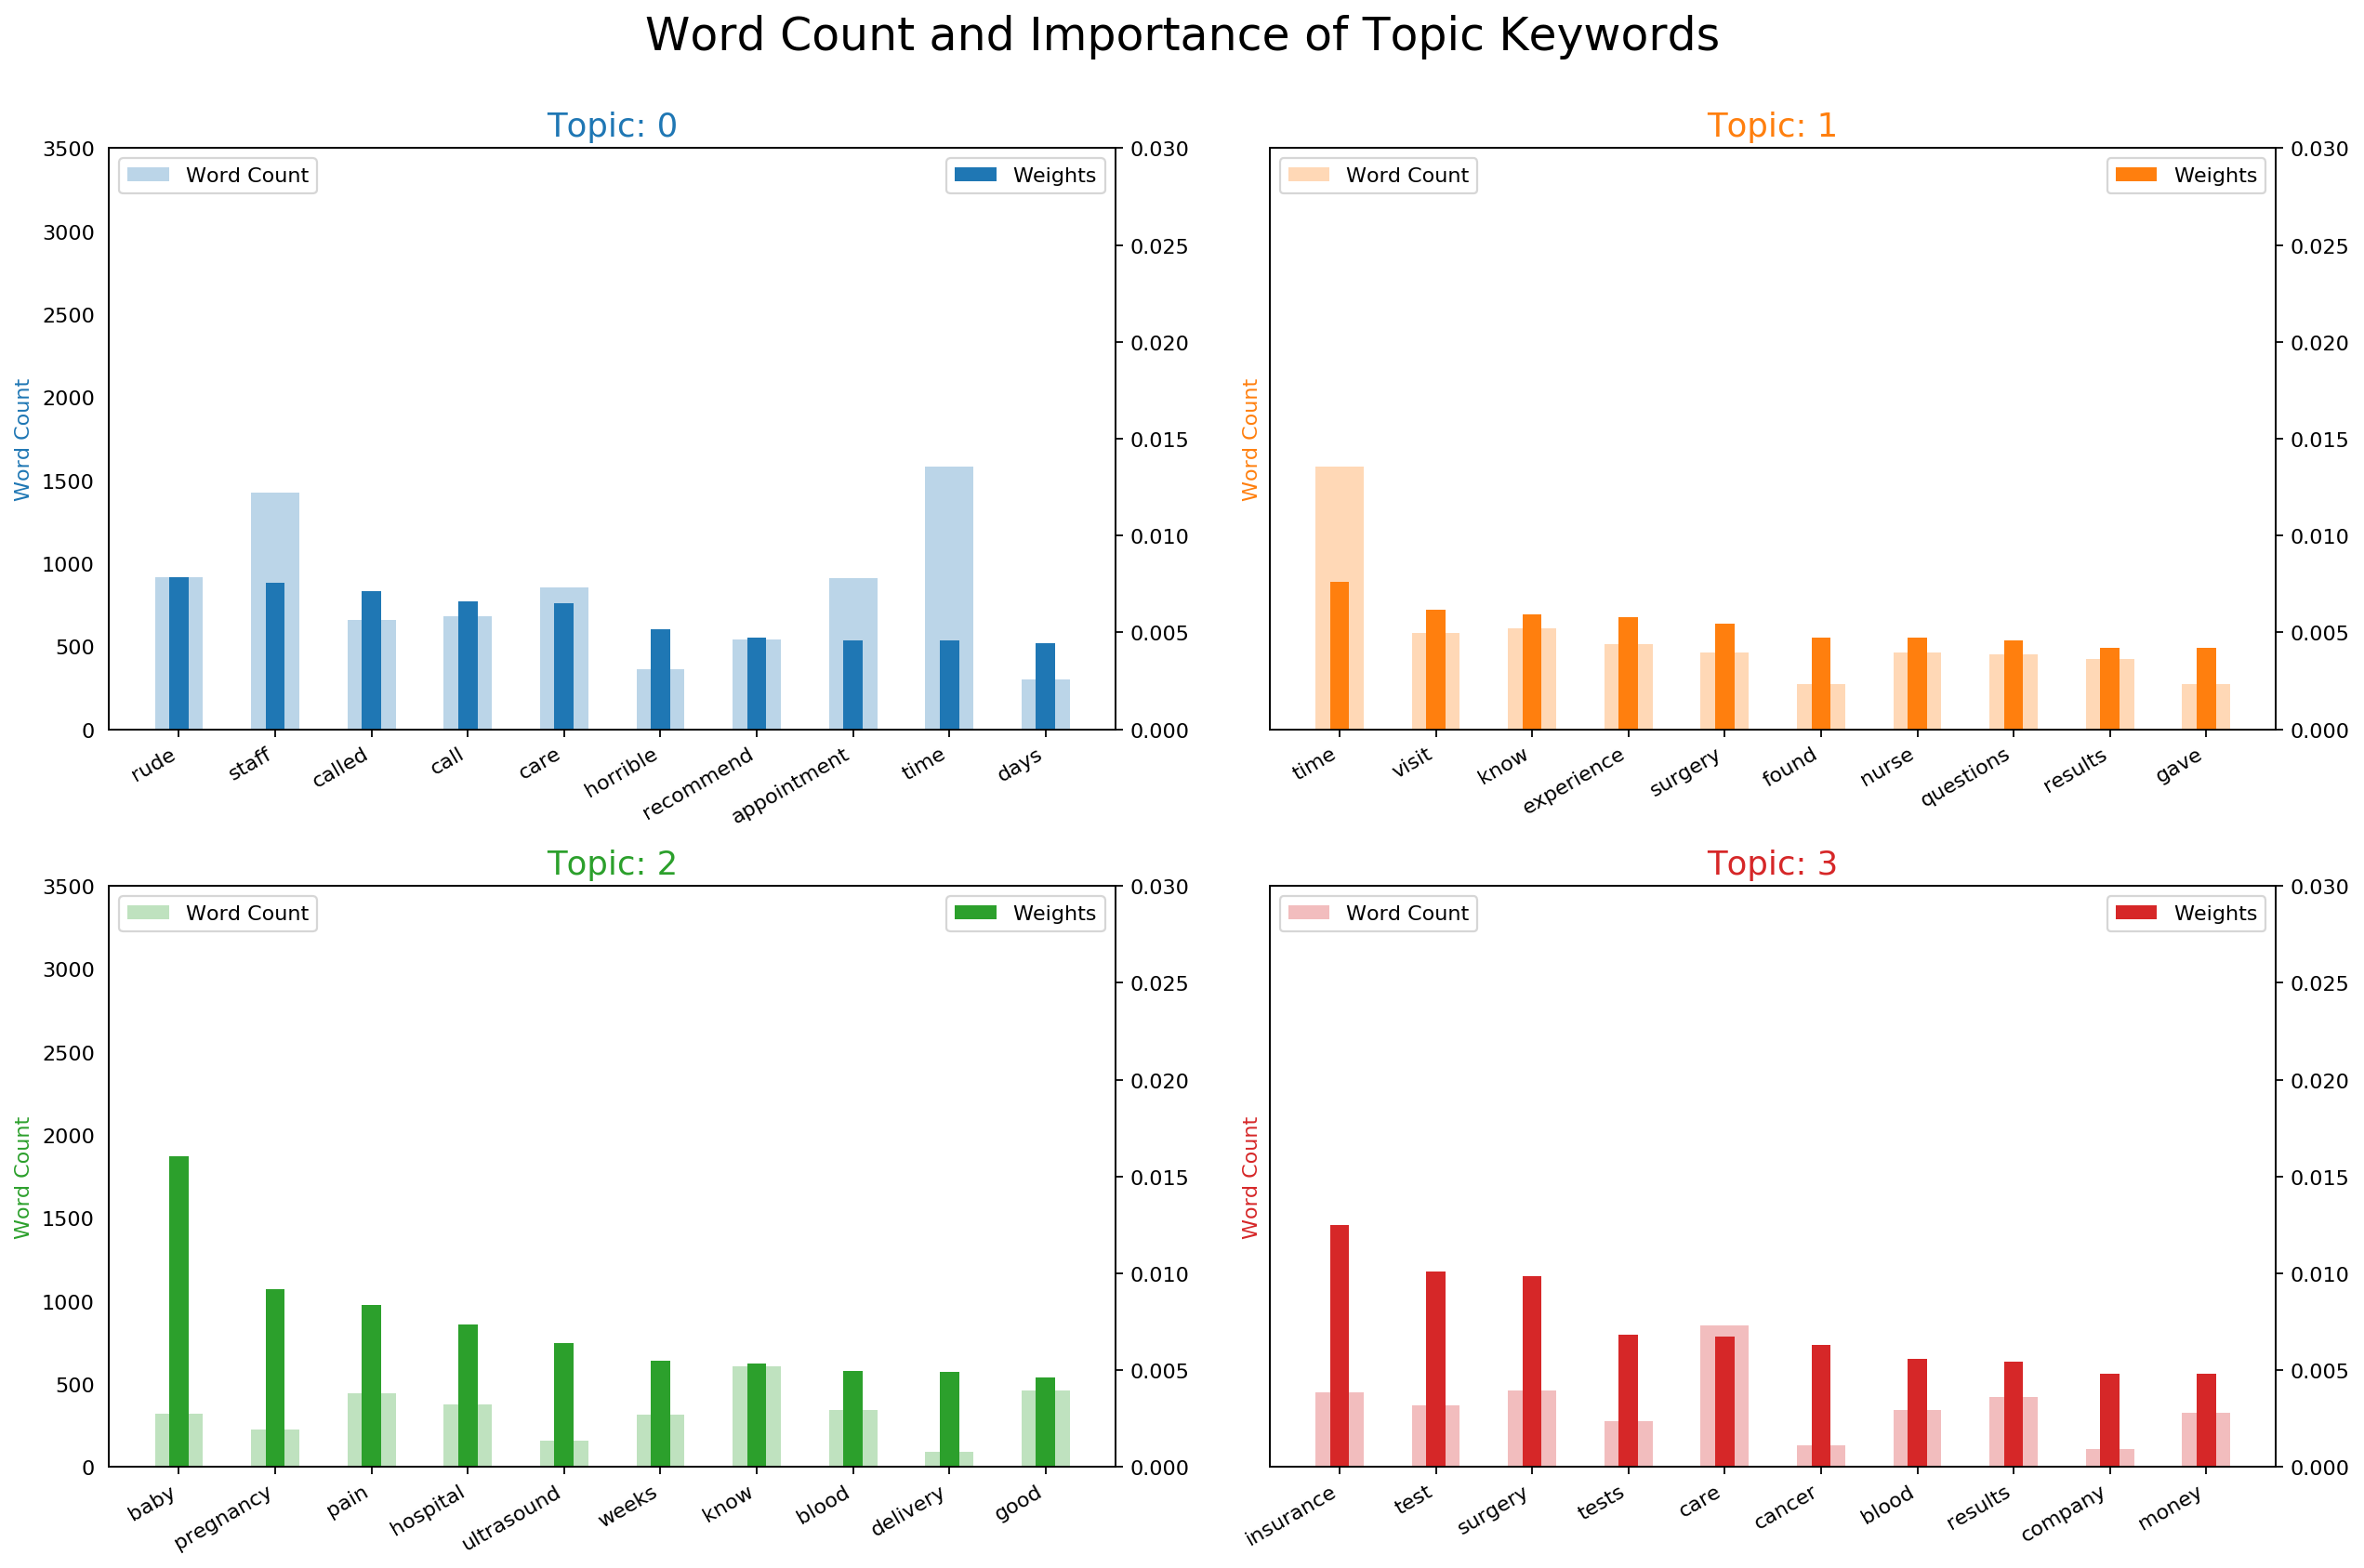

In [34]:
topics = ldamodel_b.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_b for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_b, doc_term_matrix_b, dictionary=ldamodel_b.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.136170 -0.107075       1        1  33.927727
1     -0.006712  0.006667       2        1  19.490158
0     -0.054312 -0.034017       3        1  18.924566
2     -0.031385  0.181218       4        1  16.240524
3      0.228579 -0.046792       5        1  11.417033, topic_info=      Category         Freq            Term        Total  loglift  logprob
92     Default  1291.000000           staff  1291.000000  30.0000  30.0000
4046   Default   357.000000            baby   357.000000  29.0000  29.0000
159    Default   568.000000            wait   568.000000  28.0000  28.0000
248    Default   437.000000         waiting   437.000000  27.0000  27.0000
50     Default   386.000000       insurance   386.000000  26.0000  26.0000
271    Default   330.000000            test   330.000000  25.0000  25.0000
2      Default   849.000000     appointment   849.000000  24.0000  24.0000
3819   Default   268.000000       pregnancy   268.000000  23.0000  23.0000
243    Default   330.000000            hour   330.000000  22.0000  22.0000
380    Default   454.000000         surgery   454.000000  21.0000  21.0000
100    Default  1494.000000            time  1494.000000  20.0000  20.0000
86     Default   873.000000            rude   873.000000  19.0000  19.0000
312    Default   335.000000        hospital   335.000000  18.0000  18.0000
488    Default   373.000000            pain   373.000000  17.0000  17.0000
498    Default   238.000000           tests   238.000000  16.0000  16.0000
2480   Default   185.000000      ultrasound   185.000000  15.0000  15.0000
273    Default   278.000000          waited   278.000000  14.0000  14.0000
208    Default   509.000000       questions   509.000000  13.0000  13.0000
2488   Default   110.000000        delivery   110.000000  12.0000  12.0000
850    Default   270.000000           blood   270.000000  11.0000  11.0000
72     Default   325.000000           phone   325.000000  10.0000  10.0000
2717   Default   138.000000          cancer   138.000000   9.0000   9.0000
359    Default   280.000000            long   280.000000   8.0000   8.0000
153    Default   412.000000         minutes   412.000000   7.0000   7.0000
16     Default   106.000000         company   106.000000   6.0000   6.0000
80     Default   161.000000         records   161.000000   5.0000   5.0000
5689   Default   103.000000           labor   103.000000   4.0000   4.0000
5956   Default    97.000000        csection    97.000000   3.0000   3.0000
244    Default   313.000000           hours   313.000000   2.0000   2.0000
414    Default   274.000000            away   274.000000   1.0000   1.0000
609     Topic1    69.310249           spend    70.005524   1.0710  -6.5084
452     Topic1    63.089737      reschedule    63.777927   1.0701  -6.6024
159     Topic1   561.556885            wait   568.341614   1.0689  -4.4163
248     Topic1   431.718231         waiting   437.552460   1.0675  -4.6792
1012    Topic1    34.172386            slow    34.866333   1.0608  -7.2156
1322    Topic1    32.730522          rushes    33.422543   1.0600  -7.2587
4993    Topic1    31.046623               u    31.746651   1.0586  -7.3115
6143    Topic1    28.202995           piece    28.927683   1.0556  -7.4076
243     Topic1   321.720551            hour   330.254395   1.0548  -4.9733
1191    Topic1    23.382925       apologize    24.078230   1.0516  -7.5950
1750    Topic1    23.183779           black    23.878357   1.0514  -7.6035
2665    Topic1    21.948183         confirm    22.644484   1.0497  -7.6583
774     Topic1    20.380716        valuable    21.075912   1.0474  -7.7324
454     Topic1    19.981346           rooms    20.666521   1.0472  -7.7522
2059    Topic1    20.767565         rushing    21.492128   1.0466  -7.7136
2780    Topic1    19.462818          booked    20.153332   1.0461  -7.7785
2247    Topic1    19.428270       mammogram    20.1346

# Analysis Based on Each of the Six Specialties

### General Practitioners

In [36]:
# Clean Null Values
df_gp = df_gp[df_gp.review.notnull()]
df_gp = df_gp[df_gp.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_gp = df_gp[['individual_rating', 'review']]
df_gp.individual_rating = df_gp.individual_rating.astype(float)
df_gp = df_gp[(df_gp.individual_rating >= 4) | (df_gp.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_gp['is_good'] = (df_gp.individual_rating >= 4) * 1 + (df_gp.individual_rating < 3) * 0


gp_sub = df_gp.review.str.lower()
gp_sub = removePunc(gp_sub)
gp_sub = removeNumbers(gp_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_gp = vec.fit_transform(gp_sub)
dtm_gp = pd.DataFrame(X_gp.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_gp = dtm_gp.T
print(tdm_gp.shape)

(3694, 2836)


### Calculate Fisher's Discriminant Score

In [37]:
mask_gp = pd.DataFrame(df_gp.is_good)
good_df_gp = dtm.iloc[np.any(mask_gp.values,axis=1),]
bad_df_gp = dtm.iloc[~np.any(mask_gp.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [38]:
FiDi_gp = pd.DataFrame(((good_df_gp.mean() - bad_df_gp.mean())**2)/(np.std(good_df_gp)**2 + np.std(bad_df_gp)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_gp = FiDi_gp.term.tolist()
words_gp = stopText(words_gp)
words_gp = stopOther(words_gp)

words_gp = pd.Series(words_gp).str.lstrip(" ").tolist()

FiDi_gp = FiDi_gp[FiDi_gp.term.isin(words_gp)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_gp.head(25)

,term,FiDi_score
13276,trying,0.009587
13277,trying_to,0.009085
5589,highly_recommend_her,0.008525
5997,if_they,0.008043
14038,was_trying,0.007736
7581,me_it,0.007574
8128,my_ob,0.007374
7195,life_and,0.006943
14039,was_trying_to,0.006712
5592,highly_recommend_him,0.006686


### Create DF of most Frequent Words

In [39]:
tdm_gp['total'] = tdm_gp.sum(axis =1)
freq_gp = tdm_gp.reset_index().rename(columns = {"level_0":"allwords"})

words2_gp = freq_gp.allwords.tolist()
words2_gp = stopText(words2_gp)
words2_gp = stopOther(words2_gp)

words2_gp = pd.Series(words2_gp).str.lstrip(" ").tolist()

freq_gp = freq_gp[freq_gp.allwords.isin(words2_gp)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_gp.head(25)

,allwords,total
3047,time,916
2730,staff,691
544,care,538
1144,great,495
2419,recommend,396
930,family,396
1132,good,368
455,best,358
291,appointment,322
566,caring,318


### Most frequent phrases

In [40]:
freq_gp['under_count'] = freq_gp.allwords.str.count('_')
freq_gp[freq_gp.under_count>=3].head(25)

,allwords,total,under_count
2801,takes_the_time_to,65,3
2205,one_of_the_best,51,3
3061,time_to_listen_to,38,3
1601,is_the_best_doctor,34,3
1216,have_been_going_to,33,3
2962,the_time_to_listen,33,3
562,cares_about_his_patients,31,3
428,been_going_to_dr,30,3
1220,have_been_patient_of,29,3
1620,is_very_knowledgeable_and,25,3


### General_Practitioner - Good

In [41]:
# Make a separate df of good reviews and bad reviews
df_gp_good = df_gp[(df_gp.individual_rating >= 4)]
df_gp_bad = df_gp[(df_gp.individual_rating < 3)]

# Clean all reviews 
reviews_gp_g = df_gp_good.review.str.lower()
reviews_gp_g = removePunc(reviews_gp_g)
reviews_gp_g = removeNumbers(reviews_gp_g)
reviews_gp_g = stopText(reviews_gp_g)
reviews_gp_g = stopOther(reviews_gp_g)

gp_good = [j.lower() for j in reviews_gp_g]

sentences_gp_g = textTokenize(gp_good)
sentences_gp_g = [j for j in sentences_gp_g if len(j)>0]

#Train the model on Word2Vec
model_gp_g = gensim.models.Word2Vec(sentences_gp_g, min_count=1)

model_gp_g.wv.most_similar('time',topn=5)

NameError: ignored

### General_Practitioner - Bad

In [0]:
# Clean all reviews 
reviews_gp_b = df_gp_bad.review.str.lower()
reviews_gp_b = removePunc(reviews_gp_b)
reviews_gp_b = removeNumbers(reviews_gp_b)
reviews_gp_b = stopText(reviews_gp_b)
reviews_gp_b = stopOther(reviews_gp_b)

gp_bad = [j.lower() for j in reviews_gp_b]

sentences_gp_b = textTokenize(gp_bad)
sentences_gp_b = [j for j in sentences_gp_b if len(j)>0]

#Train the model on Word2Vec
model_gp_b = gensim.models.Word2Vec(sentences_gp_b, min_count=1)

model_gp_b.wv.most_similar('time',topn=5)

## Cardiology

In [0]:
# Clean Null Values
df_cardio = df_cardio[df_cardio.review.notnull()]
df_cardio = df_cardio[df_cardio.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_cardio = df_cardio[['individual_rating', 'review']]
df_cardio.individual_rating = df_cardio.individual_rating.astype(float)
df_cardio = df_cardio[(df_cardio.individual_rating >= 4) | (df_cardio.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_cardio['is_good'] = (df_cardio.individual_rating >= 4) * 1 + (df_cardio.individual_rating < 3) * 0


cardio_sub = df_cardio.review.str.lower()
cardio_sub = removePunc(cardio_sub)
cardio_sub = removeNumbers(cardio_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_cardio = vec.fit_transform(cardio_sub)
dtm_cardio = pd.DataFrame(X_cardio.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_cardio = dtm_cardio.T
print(tdm_cardio.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_cardio = pd.DataFrame(df_cardio.is_good)
good_df_cardio = dtm.iloc[np.any(mask_cardio.values,axis=1),]
bad_df_cardio = dtm.iloc[~np.any(mask_cardio.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_cardio) + len(good_df_cardio))/len(dtm_cardio)

In [0]:
FiDi_cardio = pd.DataFrame(((good_df_cardio.mean() - bad_df_cardio.mean())**2)/(np.std(good_df_cardio)**2 + np.std(bad_df_cardio)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_cardio = FiDi_cardio.term.tolist()
words_cardio = stopText(words_cardio)
words_cardio = stopOther(words_cardio)

words_cardio = pd.Series(words_cardio).str.lstrip(" ").tolist()

FiDi_cardio = FiDi_cardio[FiDi_cardio.term.isin(words_cardio)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_cardio.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_cardio['total'] = tdm_cardio.sum(axis =1)
freq_cardio = tdm_cardio.reset_index().rename(columns = {"level_0":"allwords"})

words2_cardio = freq_cardio.allwords.tolist()
words2_cardio = stopText(words2_cardio)
words2_cardio = stopOther(words2_cardio)

words2_cardio = pd.Series(words2_cardio).str.lstrip(" ").tolist()

freq_cardio = freq_cardio[freq_cardio.allwords.isin(words2_cardio)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_cardio.head(25)

### Most frequent phrases

In [0]:
freq_cardio['under_count'] = freq_cardio.allwords.str.count('_')
freq_cardio[freq_cardio.under_count>=3].head(25)

### Cardiology - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_cardio_good = df_cardio[(df_cardio.individual_rating >= 4)]
df_cardio_bad = df_cardio[(df_cardio.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_cardio_g = df_cardio_good.review.str.lower()
reviews_cardio_g = removePunc(reviews_cardio_g)
reviews_cardio_g = removeNumbers(reviews_cardio_g)
reviews_cardio_g = stopText(reviews_cardio_g)
reviews_cardio_g = stopOther(reviews_cardio_g)

cardio_good = [j.lower() for j in reviews_cardio_g]

sentences_cardio_g = textTokenize(cardio_good)
sentences_cardio_g = [j for j in sentences_cardio_g if len(j)>0]

#Train the model on Word2Vec
model_cardio_g = gensim.models.Word2Vec(sentences_cardio_g, min_count=1)

model_cardio_g.wv.most_similar('time',topn=5)

### Cardiology - Bad

In [0]:
# Clean all reviews 
reviews_cardio_b = df_cardio_bad.review.str.lower()
reviews_cardio_b = removePunc(reviews_cardio_b)
reviews_cardio_b = removeNumbers(reviews_cardio_b)
reviews_cardio_b = stopText(reviews_cardio_b)
reviews_cardio_b = stopOther(reviews_cardio_b)

cardio_bad = [j.lower() for j in reviews_cardio_b]

sentences_cardio_b = textTokenize(cardio_bad)
sentences_cardio_b = [j for j in sentences_cardio_b if len(j)>0]

#Train the model on Word2Vec
model_cardio_b = gensim.models.Word2Vec(sentences_cardio_b, min_count=1)

model_cardio_b.wv.most_similar('time',topn=5)

## Internal Medicine

In [0]:
# Clean Null Values
df_intern = df_intern[df_intern.review.notnull()]
df_intern = df_intern[df_intern.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_intern = df_intern[['individual_rating', 'review']]
df_intern.individual_rating = df_intern.individual_rating.astype(float)
df_intern = df_intern[(df_intern.individual_rating >= 4) | (df_intern.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_intern['is_good'] = (df_intern.individual_rating >= 4) * 1 + (df_intern.individual_rating < 3) * 0


intern_sub = df_intern.review.str.lower()
intern_sub = removePunc(intern_sub)
intern_sub = removeNumbers(intern_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_intern = vec.fit_transform(intern_sub)
dtm_intern = pd.DataFrame(X_intern.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_intern = dtm_intern.T
print(tdm_intern.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_intern = pd.DataFrame(df_intern.is_good)
good_df_intern = dtm.iloc[np.any(mask_intern.values,axis=1),]
bad_df_intern = dtm.iloc[~np.any(mask_intern.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_intern) + len(good_df_intern))/len(dtm_intern)

In [0]:
FiDi_intern = pd.DataFrame(((good_df_intern.mean() - bad_df_intern.mean())**2)/(np.std(good_df_intern)**2 + np.std(bad_df_intern)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_intern = FiDi_intern.term.tolist()
words_intern = stopText(words_intern)
words_intern = stopOther(words_intern)

words_intern = pd.Series(words_intern).str.lstrip(" ").tolist()

FiDi_intern = FiDi_intern[FiDi_intern.term.isin(words_intern)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_intern.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_intern['total'] = tdm_intern.sum(axis =1)
freq_intern = tdm_intern.reset_index().rename(columns = {"level_0":"allwords"})

words2_intern = freq_intern.allwords.tolist()
words2_intern = stopText(words2_intern)
words2_intern = stopOther(words2_intern)

words2_intern = pd.Series(words2_intern).str.lstrip(" ").tolist()

freq_intern = freq_intern[freq_intern.allwords.isin(words2_intern)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_intern.head(25)

### Most frequent phrases

In [0]:
freq_intern['under_count'] = freq_intern.allwords.str.count('_')
freq_intern[freq_intern.under_count>=3].head(25)

### Internal_Med - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_intern_good = df_intern[(df_intern.individual_rating >= 4)]
df_intern_bad = df_intern[(df_intern.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_intern_g = df_intern_good.review.str.lower()
reviews_intern_g = removePunc(reviews_intern_g)
reviews_intern_g = removeNumbers(reviews_intern_g)
reviews_intern_g = stopText(reviews_intern_g)
reviews_intern_g = stopOther(reviews_intern_g)

intern_good = [j.lower() for j in reviews_intern_g]

sentences_intern_g = textTokenize(intern_good)
sentences_intern_g = [j for j in sentences_intern_g if len(j)>0]

#Train the model on Word2Vec
model_intern_g = gensim.models.Word2Vec(sentences_intern_g, min_count=1)

model_intern_g.wv.most_similar('time',topn=5)

### Internal_Med - Bad

In [0]:
# Clean all reviews 
reviews_intern_b = df_intern_bad.review.str.lower()
reviews_intern_b = removePunc(reviews_intern_b)
reviews_intern_b = removeNumbers(reviews_intern_b)
reviews_intern_b = stopText(reviews_intern_b)
reviews_intern_b = stopOther(reviews_intern_b)

intern_bad = [j.lower() for j in reviews_intern_b]

sentences_intern_b = textTokenize(intern_bad)
sentences_intern_b = [j for j in sentences_intern_b if len(j)>0]

#Train the model on Word2Vec
model_intern_b = gensim.models.Word2Vec(sentences_intern_b, min_count=1)

model_intern_b.wv.most_similar('time',topn=5)

## Paediatrics

In [0]:
# Clean Null Values
df_ped = df_ped[df_ped.review.notnull()]
df_ped = df_ped[df_ped.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ped = df_ped[['individual_rating', 'review']]
df_ped.individual_rating = df_ped.individual_rating.astype(float)
df_ped = df_ped[(df_ped.individual_rating >= 4) | (df_ped.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ped['is_good'] = (df_ped.individual_rating >= 4) * 1 + (df_ped.individual_rating < 3) * 0


ped_sub = df_ped.review.str.lower()
ped_sub = removePunc(ped_sub)
ped_sub = removeNumbers(ped_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ped = vec.fit_transform(ped_sub)
dtm_ped = pd.DataFrame(X_ped.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ped = dtm_ped.T
print(tdm_ped.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ped = pd.DataFrame(df_ped.is_good)
good_df_ped = dtm.iloc[np.any(mask_ped.values,axis=1),]
bad_df_ped = dtm.iloc[~np.any(mask_ped.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ped) + len(good_df_ped))/len(dtm_ped)

In [0]:
FiDi_ped = pd.DataFrame(((good_df_ped.mean() - bad_df_ped.mean())**2)/(np.std(good_df_ped)**2 + np.std(bad_df_ped)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ped = FiDi_ped.term.tolist()
words_ped = stopText(words_ped)
words_ped = stopOther(words_ped)

words_ped = pd.Series(words_ped).str.lstrip(" ").tolist()

FiDi_ped = FiDi_ped[FiDi_ped.term.isin(words_ped)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ped.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ped['total'] = tdm_ped.sum(axis =1)
freq_ped = tdm_ped.reset_index().rename(columns = {"level_0":"allwords"})

words2_ped = freq_ped.allwords.tolist()
words2_ped = stopText(words2_ped)
words2_ped = stopOther(words2_ped)

words2_ped = pd.Series(words2_ped).str.lstrip(" ").tolist()

freq_ped = freq_ped[freq_ped.allwords.isin(words2_ped)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ped.head(25)

### Most frequent phrases

In [0]:
freq_ped['under_count'] = freq_ped.allwords.str.count('_')
freq_ped[freq_ped.under_count>=3].head(25)

### Paediatrics - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_ped_good = df_ped[(df_ped.individual_rating >= 4)]
df_ped_bad = df_ped[(df_ped.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_ped_g = df_ped_good.review.str.lower()
reviews_ped_g = removePunc(reviews_ped_g)
reviews_ped_g = removeNumbers(reviews_ped_g)
reviews_ped_g = stopText(reviews_ped_g)
reviews_ped_g = stopOther(reviews_ped_g)

ped_good = [j.lower() for j in reviews_ped_g]

sentences_ped_g = textTokenize(ped_good)
sentences_ped_g = [j for j in sentences_ped_g if len(j)>0]

#Train the model on Word2Vec
model_ped_g = gensim.models.Word2Vec(sentences_ped_g, min_count=1)

model_ped_g.wv.most_similar('time',topn=5)

### Paediatrics - Bad

In [0]:
# Clean all reviews 
reviews_ped_b = df_ped_bad.review.str.lower()
reviews_ped_b = removePunc(reviews_ped_b)
reviews_ped_b = removeNumbers(reviews_ped_b)
reviews_ped_b = stopText(reviews_ped_b)
reviews_ped_b = stopOther(reviews_ped_b)

ped_bad = [j.lower() for j in reviews_ped_b]

sentences_ped_b = textTokenize(ped_bad)
sentences_ped_b = [j for j in sentences_ped_b if len(j)>0]

#Train the model on Word2Vec
model_ped_b = gensim.models.Word2Vec(sentences_ped_b, min_count=1)

model_ped_b.wv.most_similar('time',topn=5)

## General Surgery

In [0]:
# Clean Null Values
df_surg = df_surg[df_surg.review.notnull()]
df_surg = df_surg[df_surg.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_surg = df_surg[['individual_rating', 'review']]
df_surg.individual_rating = df_surg.individual_rating.astype(float)
df_surg = df_surg[(df_surg.individual_rating >= 4) | (df_surg.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_surg['is_good'] = (df_surg.individual_rating >= 4) * 1 + (df_surg.individual_rating < 3) * 0


surg_sub = df_surg.review.str.lower()
surg_sub = removePunc(surg_sub)
surg_sub = removeNumbers(surg_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_surg = vec.fit_transform(surg_sub)
dtm_surg = pd.DataFrame(X_surg.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_surg = dtm_surg.T
print(tdm_surg.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_surg = pd.DataFrame(df_surg.is_good)
good_df_surg = dtm.iloc[np.any(mask_surg.values,axis=1),]
bad_df_surg = dtm.iloc[~np.any(mask_surg.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_surg) + len(good_df_surg))/len(dtm_surg)

In [0]:
FiDi_surg = pd.DataFrame(((good_df_surg.mean() - bad_df_surg.mean())**2)/(np.std(good_df_surg)**2 + np.std(bad_df_surg)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_surg = FiDi_surg.term.tolist()
words_surg = stopText(words_surg)
words_surg = stopOther(words_surg)

words_surg = pd.Series(words_surg).str.lstrip(" ").tolist()

FiDi_surg = FiDi_surg[FiDi_surg.term.isin(words_surg)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_surg.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_surg['total'] = tdm_surg.sum(axis =1)
freq_surg = tdm_surg.reset_index().rename(columns = {"level_0":"allwords"})

words2_surg = freq_surg.allwords.tolist()
words2_surg = stopText(words2_surg)
words2_surg = stopOther(words2_surg)

words2_surg = pd.Series(words2_surg).str.lstrip(" ").tolist()

freq_surg = freq_surg[freq_surg.allwords.isin(words2_surg)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_surg.head(25)

### Most frequent phrases

In [0]:
freq_surg['under_count'] = freq_surg.allwords.str.count('_')
freq_surg[freq_surg.under_count>=3].head(25)

### General_Surgery - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_surg_good = df_surg[(df_surg.individual_rating >= 4)]
df_surg_bad = df_surg[(df_surg.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_surg_g = df_surg_good.review.str.lower()
reviews_surg_g = removePunc(reviews_surg_g)
reviews_surg_g = removeNumbers(reviews_surg_g)
reviews_surg_g = stopText(reviews_surg_g)
reviews_surg_g = stopOther(reviews_surg_g)

surg_good = [j.lower() for j in reviews_surg_g]

sentences_surg_g = textTokenize(surg_good)
sentences_surg_g = [j for j in sentences_surg_g if len(j)>0]

#Train the model on Word2Vec
model_surg_g = gensim.models.Word2Vec(sentences_surg_g, min_count=1)

model_surg_g.wv.most_similar('time',topn=5)

### General_Surgery - Bad

In [0]:
# Clean all reviews 
reviews_surg_b = df_surg_bad.review.str.lower()
reviews_surg_b = removePunc(reviews_surg_b)
reviews_surg_b = removeNumbers(reviews_surg_b)
reviews_surg_b = stopText(reviews_surg_b)
reviews_surg_b = stopOther(reviews_surg_b)

surg_bad = [j.lower() for j in reviews_surg_b]

sentences_surg_b = textTokenize(surg_bad)
sentences_surg_b = [j for j in sentences_surg_b if len(j)>0]

#Train the model on Word2Vec
model_surg_b = gensim.models.Word2Vec(sentences_surg_b, min_count=1)

model_surg_b.wv.most_similar('time',topn=5)

## OBGYN

In [0]:
# Clean Null Values
df_ob = df_ob[df_ob.review.notnull()]
df_ob = df_ob[df_ob.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ob = df_ob[['individual_rating', 'review']]
df_ob.individual_rating = df_ob.individual_rating.astype(float)
df_ob = df_ob[(df_ob.individual_rating >= 4) | (df_ob.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ob['is_good'] = (df_ob.individual_rating >= 4) * 1 + (df_ob.individual_rating < 3) * 0


ob_sub = df_ob.review.str.lower()
ob_sub = removePunc(ob_sub)
ob_sub = removeNumbers(ob_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ob = vec.fit_transform(ob_sub)
dtm_ob = pd.DataFrame(X_ob.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ob = dtm_ob.T
print(tdm_ob.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ob = pd.DataFrame(df_ob.is_good)
good_df_ob = dtm.iloc[np.any(mask_ob.values,axis=1),]
bad_df_ob = dtm.iloc[~np.any(mask_ob.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ob) + len(good_df_ob))/len(dtm_ob)

In [0]:
FiDi_ob = pd.DataFrame(((good_df_ob.mean() - bad_df_ob.mean())**2)/(np.std(good_df_ob)**2 + np.std(bad_df_ob)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ob = FiDi_ob.term.tolist()
words_ob = stopText(words_ob)
words_ob = stopOther(words_ob)

words_ob = pd.Series(words_ob).str.lstrip(" ").tolist()

FiDi_ob = FiDi_ob[FiDi_ob.term.isin(words_ob)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ob.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ob['total'] = tdm_ob.sum(axis =1)
freq_ob = tdm_ob.reset_index().rename(columns = {"level_0":"allwords"})

words2_ob = freq_ob.allwords.tolist()
words2_ob = stopText(words2_ob)
words2_ob = stopOther(words2_ob)

words2_ob = pd.Series(words2_ob).str.lstrip(" ").tolist()

freq_ob = freq_surg[freq_ob.allwords.isin(words2_ob)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ob.head(25)

### Most frequent phrases

In [0]:
freq_ob['under_count'] = freq_ob.allwords.str.count('_')
freq_ob[freq_ob.under_count>=3].head(25)

### OBGYN - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_ob_good = df_ob[(df_ob.individual_rating >= 4)]
df_ob_bad = df_ob[(df_ob.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_ob_g = df_ob_good.review.str.lower()
reviews_ob_g = removePunc(reviews_ob_g)
reviews_ob_g = removeNumbers(reviews_ob_g)
reviews_ob_g = stopText(reviews_ob_g)
reviews_ob_g = stopOther(reviews_ob_g)

ob_good = [j.lower() for j in reviews_ob_g]

sentences_ob_g = textTokenize(ob_good)
sentences_ob_g = [j for j in sentences_ob_g if len(j)>0]

#Train the model on Word2Vec
model_ob_g = gensim.models.Word2Vec(sentences_ob_g, min_count=1)

model_ob_g.wv.most_similar('time',topn=5)

### OBGYN - Bad

In [0]:
# Clean all reviews 
reviews_ob_b = df_ob_bad.review.str.lower()
reviews_ob_b = removePunc(reviews_ob_b)
reviews_ob_b = removeNumbers(reviews_ob_b)
reviews_ob_b = stopText(reviews_ob_b)
reviews_ob_b = stopOther(reviews_ob_b)

ob_bad = [j.lower() for j in reviews_ob_b]

sentences_ob_b = textTokenize(ob_bad)
sentences_ob_b = [j for j in sentences_ob_b if len(j)>0]

#Train the model on Word2Vec
model_ob_b = gensim.models.Word2Vec(sentences_ob_b, min_count=1)

model_ob_b.wv.most_similar('time',topn=5)